# League of Legends - Worlds 2023 Swiss Style System Update. What does that mean for the West?

Since 2011, Riot Games have hosted yearly world championships inviting the best teams from many regions around the world. For the 2023 world championship, they have updated their groups stage from 4 groups of 4 teams (where after a double round robin within each group, the top two teams advance) to a Swiss style knockout stage. Here, each team races to achieve 3 set wins before 3 set losses, only fighting against teams with an equivalent scoreline at each step of the way. Since League has never seen such a system at the international level, it is natural to ask what impact this might have for Western teams, as we typically perform better in volatile formats, such as the previous 'best of one' double round robin groups stage. We look to construct a stochastic simulation to investigate what outcomes one can expect from the new tournament system implemented by Riot, and evaluate to see what chances the West has at Worlds 2023. To begin with we will need to make some assumptions in order to achieve some kind of model, although first we will need to briefly cover the previous tournament setup.

A disclaimer before we start. The data isn't cleverly scraped, this project isn't perfect and the process not as detailed as it could be. Even so, I am confident the method used provides a well-made stochastic simulation that meaningfully represents what could happen later this year at Worlds 2023 throughout October / November. I have done my utmost to outline my assumptions and justify my process below.

# Overview
## Previous Tournament(s)

The previous structure was as follows. The regions of the world were split into two rough classifications, major and minor regions. Each region would send a number of their best teams as representatives to international tournmanents, where depending on the tournament in question there would be a different structure. Major regions (China, Korea, Europe and North America) typically have their best teams seeded further into international tournament, whereas minor regions (Vietnam, South Asia, Oceania, Turkey, Japan, Brazil, Latin America and the Commonweath of Independent States), along with the lower seeds of major regions, must play through some play-in or entrance tournament. Throughout its history, League of Legends has had 4 primary international events. Worlds (the main international event where a world champion is crowned which is held yearly between September and November), the Mid-Season Invitational (a smaller tournament hosted between spring and summer for the winners of the winter/spring tournaments in each region), Asian Games, and All-Stars. The All-Stars tournament is an off-season international tournament featuring fan-voted players, and was last seen in 2020, and as such will not be used in the data set. The Asian Games are an internationally recognised competition between countries who choose six players and coaching staff to send as their representatives. While League of Legends is used, it is not an exclusively Riot Games event. Therefore the Asian Games include a mix of the best players from various Asian Regions, typically from accross multiple teams. While it is a hyper-competitive event (South Korean players who win a gold medal in the Asian Games are granted a military exemption https://edition.cnn.com/2023/09/26/sport/esports-asian-games-military-exemption-medals-hnk-spt-intl/index.html) that commonly showcases some of the highest echelons of competitive play, both players and coaches lack the potentially years of experience working together that teams competing at Worlds or MSI have. Further, many smaller countries are included in the Asian Games tourament, such as Hong Kong, Malaysia, Singapore and Thailand, and players who play for one Region at Worlds or MSI may be play for their home country's team in the Asian Games. Therefore as these teams do not represent those that would have had to fight through their regional league to be seeded into Worlds or MSI, and there are significant differences in how these teams are constructed, we will also be excluding the Asian Games from our data set, and therefore will only be considering the Mid-Season Invitational and Worlds matches as valid observations.

The main issue we face is that as there are different numbers of representatives from different regions sent to each tournament, observations between the strongest seeds (Korea/China 1st seeds) and the weakest seeds (minor regions who struggle to make it to the main stage) are extremely limited / completely unobserved. As such, our first assumption is that we will be measuring each Region's strength, rather than the strength of each region's seed individually (for example we will treat the 3rd seed of Europe the same as their 1st seed). In addition to increasing the pool of observations (matches) between different regions, this allows us a much simpler way to tackle changes in regions and regional construction throughout history. Once upon a time, Latin America was split into North and South, and East Asia was split into different subsections. Here, we can simply group each collection of sub-regions into their eventual modern equivalent set.


## Blue-Team advantage and Side Selection

League of Legends has two different teams, Blue and Red, and while the map is mostly symmetrical, just like chess, one side has had a consistant advantage over history. Blue has long been considered the stronger team, and is chosen most often over the history of professional play. There have been certain times in leagues history where particular strategies for teams have left Red the more attractive option, but these are rare and specific to said teams. Typically the higher seed going into a match gets side selection in the first match (if the match is a best of 3 or 5), or teams will get to play once on both sides (in the double round robin mentioned above). The other way a team will have to choose a side is when they lose a match in a best of 3 or 5. I can't think of a fair way to represent this specific Red quirk for specific regions in history without having to watch several hundreds of hours of matches, and currently in 2023 (as of August/September) there seems to be a strong Blue preference over all 4 major regions. I can think of three different ways to tackle this.

1) We could always have the team with side selection choose Blue, and impose some Prior that will have (on average) better win-odds
2) We could work out some probability of a team choosing Red, and some win-chance of the team IF Red is chosen
3) We could calculate a global prior of Blue vs Red win chance, update the win chance for each region, and give whoever has side selection the choice of the better side for their region in the given circumstance

Even though option 3 assumes some perfect knowledge of teams and their prefered side, it is better informed by historic data and leaves room to easily include a Prior distribution on the global probability of Blue winning vs Red (before region, and therefore team strength, is considered). While slightly unrealistic, both other options are lacking. Some variant of option 2 would likely induce more modelling error as we would have to assume or estimate the chance a team chooses the better side in a given meta, and some variant of option 1 would include making the greater assumption that Blue is superior for every Region regardless of historical information, and therefore option 3 is by far the most appealing.

## Data and League History

As implied above, League of Legends has had many different strategies and competitive structures over its more than a decade as an international e-sport. What is considered the first Worlds tournament was won by Europe, although only 8 teams from North America, Europe and what was at the time South East Asia competed. Korea and China would enter for the Second season, although their level of dominance wasn't nearly as uniform as it would be in future seasons. In 2016 the International Wild-Card Tournement would see its last showing before the formal Play-In tournament would become a part of the formal structure for Worlds. It is clear that some cut-off for the original seasons of League's history is required, as many of the institutions that now support teams in each region did not exist in the early years. I have chosen 2014 as the cut-off, so only data from season 5 (2015) and later will be considered. The precise cut-off does not have much justification, and there is an argument for formal analysis to see if there is a significant difference in the win-rates of different teams around these years, however there is a lot of expert knowledge that would need to be provided to justify a specific cut-off date, and a rough estimate of 2015 seems satisfactory.

Further, for the 2023 season, certain minor Regions were removed. Turkey was incorporated into Europe, forming EMEA (Europe, Middle-East and Africa, commonly refered to simply as Europe), and Oceania was incorporated into the Pacific Championship (South-East Asia), although some of their players were absorbed by North America. As such, while we have data about these regions and how they performed, we won't be needing them for the simulation (although they are used in calcualting the average win-rate of each side). Further on the topic of Regions, the Regions for League are commonly refered to in the acronym for the Championship the Region hosts. A rough guide of the current Regions primarily for non-League enjoyers used in this document follows:

Major Regions:
* Korea = LCK
* China = LPL
* Europe = LEC (As stated above we are formally EMEA, but EMEA doesn't fit nicely into 3 letters >:( )
* North America = LCS

Minor Regions:
* South-East Asia = PCS
* Vietnam = VCS
* Brazil = CBLOL
* Japan = LJL
* Latin America = LLA

where historically active regions that are no longer either:

* Oceania = OPL
* Turkey = TCL
* Commonweath of Independent States = CIS

The question is what to do with Oceania and Turkey? We can either re-classify their previous teams as they would appear in their new region, or we can remove them. Turkey is now a tier two region inside the LEC and as such none of their teams will be representing the LEC at Worlds. Further, while there was some chance of an Oceanian team to represent the PCS at Worlds, the best performing Oceanian team placed 7/8th, which implies the quality of Oceanian teams does not suitably represent the PCS, and as such both Regions should be excluded beyond calculating historic Blue advantage for our Prior.

## Assumptions

* Regions have the same chance of winning regardless of the seed of the team from said region (see above)
* Each region has a unique win probability vs each other region dependent on side selection (LEC vs LPL has different odds depending on if Europe is Blue or Red side)
* The team with side selection will choose their best side vs the opposing region (we assume some prophetic perfect knowledge of the odds)
* The Prior chosen will be a distribution for the Global win-rate of Blue/Red side before observing any regional information
* Matches between 2015-2023 (inclusive, so 8 and a half years of data) will be used, and that data further back doesn't accurately represent the current state of League of Legends in 2023.

## Outline
The plan is as follows.
1) Collect every MSI and Worlds match since 2015 and store how many games each region won and against whom.
2) Construct a Prior distribution for the chance each side has to win before observing regional data which will be the average historical win-rates
3) Construct a Beta-Binomial Posterior distribution for the probability of each region winning on Blue against every other region.
4) Construct general functions we will require for the Simulations, sampling from each probability distribution based on who is playing.
5) Simulate a historical Worlds tournament
6) Simulate the new Swiss Structure at Worlds inside the new tournament structure
7) Repeat each simulation a substantual amount of times and observe how the West performs. How many times do we make it to the finals, etc.?

# Libraries + Data

In [1]:
from collections import namedtuple
try:
    import random as rnd
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
except:
    import pip
    pip.main(['install', 'numpy'])
    pip.main(['install', 'pandas'])
    pip.main(['install', 'matplotlib'])
    pip.main(['install', 'seaborn'])
    
data_matchtable_long = pd.read_csv("Match Results DataTable.csv")

## Data Wrangling - loaded information doesn't look right from the csv, North America was stored as 'NA' (Feel Free to Skip)

Load in data csv and pivot based on region. We need this to calculate observed win percentage for our posterior distribution. Let's first see how many games each Region has won vs each other Region on Blue and Red sides respectively. Let's load the data and test a quick pivot.

In [2]:
data_matchtable_long

,BLUE REGION,BLUE SEED,BLUE TEAM,BLUE SCORE,RED SCORE,RED TEAM,RED SEED,RED REGION
0,CH,CH,⁠Bilibili Gaming,0,1,JD Gaming,CH,CH
1,CH,CH,JD Gaming,1,0,⁠Bilibili Gaming,CH,CH
2,CH,CH,⁠Bilibili Gaming,1,0,JD Gaming,CH,CH
3,CH,CH,JD Gaming,1,0,⁠Bilibili Gaming,CH,CH
4,CH,CH,⁠Bilibili Gaming,1,0,T1,KR,KR
...,...,...,...,...,...,...,...,...
1194,VT,VT,Bangkok Titans,1,0,Chiefs Esports Club,OC,OC
1195,JP,JP,DetonatioN FocusMe,0,1,Besiktas E-Sports Club,TK,TK
1196,VT,VT,Bangkok Titans,0,3,Besiktas E-Sports Club,TK,TK
1197,CI,CI,Hard Random,1,3,INTZ eSports,BR,BR


There are a total of 1200 matches, although some are single, some a best of 3 or 5, and some best of series are split into their individual games. Let's see how many games each side wins over time. That will give us the total number of matches played (for every game Red wins, Blue loses and vice versa).

In [3]:
prior_blue_win_chance = data_matchtable_long['BLUE SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
prior_red_win_chance = data_matchtable_long['RED SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
print('Blue Wins: ' + str(data_matchtable_long['BLUE SCORE'].sum()) + ', Win % = ' + str(np.round(prior_blue_win_chance,4)))
print('Red Wins: ' + str(data_matchtable_long['RED SCORE'].sum()) + ', Win % = ' + str(np.round(prior_red_win_chance,4)))
print('Total Games Played: ' + str(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum()))

Blue Wins: 863, Win % = 0.5604
Red Wins: 677, Win % = 0.4396
Total Games Played: 1540


Excellent. This supports the ~~prior belief~~ belief historically held by the community that Blue is advantaged, although only slightly. Let's Pivot the table and get our Odds by Region.

In [4]:
data_blue_wincount_pivot = data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0)
data_blue_wincount_pivot

RED REGION,BR,CH,CI,EU,JP,KR,LA,OC,SA,TK,VT,All
BLUE REGION,,,,,,,,,,,,
BR,0,1,2,1,8,0,7,3,3,8,2,35
CH,2,14,4,41,5,35,6,5,24,5,11,152
CI,8,1,0,3,2,1,8,3,3,4,1,34
EU,6,23,4,2,1,12,5,3,17,5,8,86
JP,3,0,0,0,0,0,3,5,2,0,2,15
KR,2,45,3,49,3,28,3,1,18,3,10,165
LA,1,1,8,0,4,0,1,2,2,1,3,23
OC,10,0,2,0,4,0,5,0,0,2,3,26
SA,6,3,10,9,3,8,6,1,1,10,5,62


 ! Only 663 wins on Blue are recorded in total. Clearly there is some issue with the method used to pivot the data with Pandas. Setting dropna = False, as see we have times where there are NA entries.

In [5]:
data_blue_wincount_pivot = data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0, dropna=False)
data_blue_wincount_pivot


RED REGION,BR,CH,CI,EU,JP,KR,LA,OC,SA,TK,VT,All
BLUE REGION,,,,,,,,,,,,
BR,0,1,2,1,8,0,7,3,3,8,2,37
CH,2,14,4,41,5,35,6,5,24,5,11,182
CI,8,1,0,3,2,1,8,3,3,4,1,36
EU,6,23,4,2,1,12,5,3,17,5,8,112
JP,3,0,0,0,0,0,3,5,2,0,2,18
KR,2,45,3,49,3,28,3,1,18,3,10,198
LA,1,1,8,0,4,0,1,2,2,1,3,23
OC,10,0,2,0,4,0,5,0,0,2,3,27
SA,6,3,10,9,3,8,6,1,1,10,5,69


BUT WHY? Let's have a look.

In [6]:
data_matchtable_long[data_matchtable_long.isna().any(axis=1)]

,BLUE REGION,BLUE SEED,BLUE TEAM,BLUE SCORE,RED SCORE,RED TEAM,RED SEED,RED REGION
16,NaN,NaN,Cloud9,0,1,Gen.G eSports,KR,KR
17,NaN,NaN,Cloud9,0,1,Gen.G eSports,KR,KR
18,KR,KR,Gen.G eSports,1,0,Cloud9,NaN,NaN
23,NaN,NaN,Cloud9,1,0,⁠Golden Guardians,NaN,NaN
24,NaN,NaN,Cloud9,0,1,⁠Golden Guardians,NaN,NaN
...,...,...,...,...,...,...,...,...
1162,NaN,NaN,Team SoloMid,0,1,Edward Gaming,CH,CH
1165,NaN,NaN,Team SoloMid,0,1,AHQ E-Sports Club,SA,SA
1167,KR,KR,SKTelecom T1,1,0,Team SoloMid,NaN,NaN
1171,TK,TK,Besiktas E-Sports Club,0,1,Team SoloMid,NaN,NaN


We can see all the North American teams, likely having the Tag of NA, have been registered as NaN. A look at the .csv confirms this. OOPS! Let's try this again.

# Fixed Win Counts and Correct Names
We reload the libraries here in case anyone skipped the first bit, and start up a generator for np random samples later down the line. We look to set up the Prior Blue win chance and take a look at the overall wins and games played, and update the names of ALL Regions so our data is more appealing to the general League consumer (the primary stakeholder in this).

In [7]:
# Set Generator For Lator
rng = np.random.default_rng(101)
print(rng)
data_matchtable_long = pd.read_csv("Match Results DataTable.csv").fillna('USA')
# Re-Name all the Regions to the actual League Name
data_region_pairs = [['KR', 'LCK'],
['CH', 'LPL'],
['EU', 'LEC'],
['USA', 'LCS'],
['SA', 'PCS'],
['VT', 'VCS'],
['BR', 'CBL'],
['JP', 'LJL'],
['LA', 'LLA'],
['OC', 'OPL'],
['TK', 'TCL'],
['CI','CIS']]
for pair in data_region_pairs:
    for column_name in data_matchtable_long.columns:
        data_matchtable_long.loc[data_matchtable_long[column_name] == pair[0],column_name] = pair[1]
# Find the Simple Observed averaged win rate of both sides
prior_blue_win_chance = data_matchtable_long['BLUE SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
prior_red_win_chance = data_matchtable_long['RED SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
print('Blue Wins: ' + str(data_matchtable_long['BLUE SCORE'].sum()) + ', Win % = ' + str(np.round(prior_blue_win_chance,4)))
print('Red Wins: ' + str(data_matchtable_long['RED SCORE'].sum()) + ', Win % = ' + str(np.round(prior_red_win_chance,4)))
print('Total Games Played: ' + str(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum()))
data_matchtable_long

Generator(PCG64)
Blue Wins: 863, Win % = 0.5604
Red Wins: 677, Win % = 0.4396
Total Games Played: 1540


,BLUE REGION,BLUE SEED,BLUE TEAM,BLUE SCORE,RED SCORE,RED TEAM,RED SEED,RED REGION
0,LPL,LPL,⁠Bilibili Gaming,0,1,JD Gaming,LPL,LPL
1,LPL,LPL,JD Gaming,1,0,⁠Bilibili Gaming,LPL,LPL
2,LPL,LPL,⁠Bilibili Gaming,1,0,JD Gaming,LPL,LPL
3,LPL,LPL,JD Gaming,1,0,⁠Bilibili Gaming,LPL,LPL
4,LPL,LPL,⁠Bilibili Gaming,1,0,T1,LCK,LCK
...,...,...,...,...,...,...,...,...
1194,VCS,VCS,Bangkok Titans,1,0,Chiefs Esports Club,OPL,OPL
1195,LJL,LJL,DetonatioN FocusMe,0,1,Besiktas E-Sports Club,TCL,TCL
1196,VCS,VCS,Bangkok Titans,0,3,Besiktas E-Sports Club,TCL,TCL
1197,CIS,CIS,Hard Random,1,3,INTZ eSports,CBL,CBL


Now with our North American (NA) values correctly loaded in as "LCS", we see that the total games match, and so we begin using this information to construct observed win percentages. First step, now we have our historic win-rate for Blue, we can remove regions that no longer have representatives at Worlds, and pivot the data to calculate the number of wins each region has.

In [8]:
data_remove_regions = ['OPL', 'TCL','CIS']
for region in data_remove_regions:
    for side in ['BLUE REGION','RED REGION']:
        data_matchtable_long = data_matchtable_long.drop(data_matchtable_long[data_matchtable_long[side]==region].index)
data_blue_wincount_pivot = data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", fill_value=0)
data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0)

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS,All
BLUE REGION,,,,,,,,,,
CBL,0,0,2,1,8,7,1,3,2,24
LCK,2,28,33,49,3,3,45,18,10,191
LCS,4,8,2,16,4,6,9,17,10,76
LEC,6,12,26,2,1,5,23,17,8,100
LJL,3,0,3,0,0,3,0,2,2,13
LLA,1,0,0,0,4,1,1,2,3,12
LPL,2,35,30,41,5,6,14,24,11,168
PCS,6,8,7,9,3,6,3,1,5,48
VCS,0,1,1,2,2,6,2,2,0,16


In [9]:
data_red_wincount_pivot = data_matchtable_long.pivot_table(index='RED REGION', columns='BLUE REGION', values='RED SCORE',
                                                             aggfunc="sum", fill_value=0)
data_matchtable_long.pivot_table(index='RED REGION', columns='BLUE REGION', values='RED SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0)

BLUE REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS,All
RED REGION,,,,,,,,,,
CBL,0,0,0,0,4,3,0,0,1,8
LCK,3,26,27,33,3,3,35,16,12,158
LCS,3,3,2,9,3,1,14,14,5,54
LEC,2,24,13,1,1,3,16,16,9,85
LJL,4,0,0,1,0,3,1,2,0,11
LLA,0,0,0,1,2,5,1,2,3,14
LPL,2,32,22,28,5,4,10,18,5,126
PCS,4,4,8,6,2,1,5,1,6,37
VCS,0,0,4,7,3,7,0,3,0,24


# Constructing Region Win Probabilities

As we can see from the data, there are some Regions which have NEVER won a match against another region. Obviously they have *some* chance, even if the data we have observed doesn't include a win. As such, we're going to take a Bayesian approach and look to construct a posterior distribution for the probability a Region wins on blue. Firstly, it will be interesting to see what the 95% credible intervals are for the Win Chance each Region has, and secondly we can take the Maximum Posterior estimate probabilities as win-chance for our simulation of the Swiss Stage. This will form a Win Probability matrix $\boldsymbol{\omega}$ that we will sample from when simulating matches between Regions later on.

First we must consider what our statistical model will be. We could either model each game following the Bernoulli distribution, since whether a team wins or loses is a simple binary outcome, or we could model full matches (best of threes and best of fives) following the Binomial Distirbution, as each match is a set of binary outcomes. There is a little difference in how we might approach either method, but since the Bernoulli distribution is a special case of the Binomial distribution, and therefore the Beta distribution can be used as a conjugate for both, there is minimal practical difference from a statistical point of view (as long as any side selection assumption is valid). Hence, as within each match there is an initially unknown amount of games (a best of 5 might end after 3 games if one team wins all 3), and whoever wins each game determines side selection (and therefore the probability each team wins each match), it will be much simpler we take the first approach. Therefore we look to model each game individually. We assume that the probability a Region $i$ wins a given match on the Blue team when against another Region $j$ is assumed to follow a Bernoulli distribution $$\omega_{i,j} \sim Bern(p_{i,j}).$$

Second, we're going to construct our prior distribution for the chance any Region wins on Blue. We know that the win rate Blue is roughly 56%, and that this is going to depend a lot on the quality of the team more so than this prior information. Therefore, we want a relatively flat Beta distribition with an expected value $E[X] = 0.56$. The pdf of the Beta distribution is given by $$f(x;a,b) = \frac{x^{a-1}(1-x)^{b-1}}{\Beta(a,b)},$$ with an expected value of the Beta distribution is given by
$E[x] = \frac{a}{a+b}$.
As a $Beta(1,1)$ is a Uniform distribution over $[0,1]$, and a $Beta(2,2)$ is a parabola centred on 0.5, we choose a prior disribution of $Beta(1.4,1.1)$


Text(0.5, 1.0, 'Example Likelihood Density of Beta(1.4,1.1), Sample Mean = 0.56')

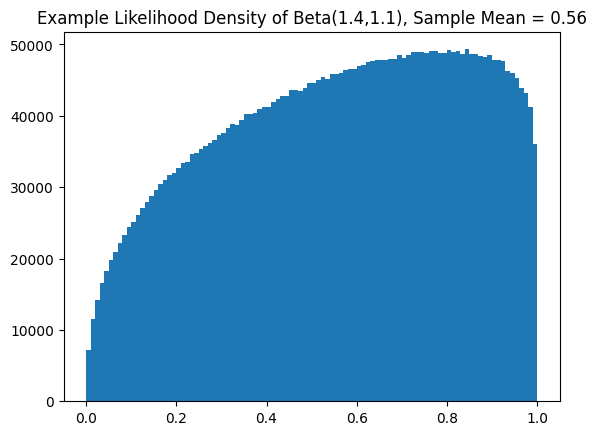

In [10]:
hyperprior_a = np.round(2.5*0.56,4)
hyperprior_b = np.round(2.5*0.44,4)
example_beta = rng.beta(a=hyperprior_a,b=hyperprior_b,size=4000000)
plt.hist(np.sort(example_beta),bins=100)
plt.title('Example Likelihood Density of Beta('+str(hyperprior_a)+','+str(hyperprior_b)+'), Sample Mean = ' + str(np.round(np.mean(example_beta),4)))

Now we need our observed games. We need both observed won and total games played from the Blue team. We know how many games each Region has won from both the Blue and Red sides, and therefore, we can calculate the total number of games. For example let's take EU. The number of games EU has played against USA is the number of games EU has won on Blue vs USA plus the number of games USA has won vs EU on Red. We can confirm if our code is correct by checking if the Region's Win probabilities sum to 1 against each other $(\text{p(region 1 win blue) } = \text{ p(region 2 lose red)}).$ Therefore:

In [11]:
data_blue_total = data_blue_wincount_pivot+data_red_wincount_pivot.T
data_red_total = data_red_wincount_pivot+data_blue_wincount_pivot.T
data_blue_wincount_pivot/data_blue_total
# Check the total sums to 1:
#data_blue_wincount_pivot/data_blue_total + (data_red_wincount_pivot/data_red_total).T

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS
BLUE REGION,,,,,,,,,
CBL,NaN,0.000000,0.400000,0.333333,0.666667,1.000000,0.333333,0.428571,1.000000
LCK,1.000000,0.518519,0.916667,0.671233,1.000000,1.000000,0.584416,0.818182,1.000000
LCS,1.000000,0.228571,0.500000,0.551724,1.000000,1.000000,0.290323,0.680000,0.714286
LEC,1.000000,0.266667,0.742857,0.666667,0.500000,0.833333,0.450980,0.739130,0.533333
LJL,0.428571,0.000000,0.500000,0.000000,NaN,0.600000,0.000000,0.500000,0.400000
LLA,0.250000,0.000000,0.000000,0.000000,0.571429,0.166667,0.200000,0.666667,0.300000
LPL,1.000000,0.500000,0.681818,0.719298,0.833333,0.857143,0.583333,0.827586,1.000000
PCS,1.000000,0.333333,0.333333,0.360000,0.600000,0.750000,0.142857,0.500000,0.625000
VCS,0.000000,0.076923,0.166667,0.181818,1.000000,0.666667,0.285714,0.250000,NaN


Hence, for $w$ won games, and $n$ total games, we calculate our Posterior Distribution given by: $$\omega | \text{data} \sim \Beta(a+w,b+n-w),$$ which has an expected value $$E[\omega] = \frac{a+w}{a+b+n}.$$ As we can see, the regions that have never played against themselves receive the prior expected probability of 0.56 to win on Blue, and those with 100% win-rate historically have varyingly high probabilities of winning depending on the strength of the data we have observed. Below is the Posterior Probability table of the Blue Side win chance across each Region pair.

We can see the dark void that occurs when any Region other than the Korea (LCK) or China (LPL) fights the LCK, with a similar although significantly less apparent dominance from the LPL. It's hard to identify visually a weakest Minor Region, and although Latin America (LLA) has consistently low odds, they do not sport the same extreme loss probabilites that are observed by Japan (LJL), South-East Asia (PCS) and Vietnam (VSC).


Text(0.5, 0.98, 'Posterior Probability of Victory for the Blue Region, \n LCK and LPL dominance on Display.')

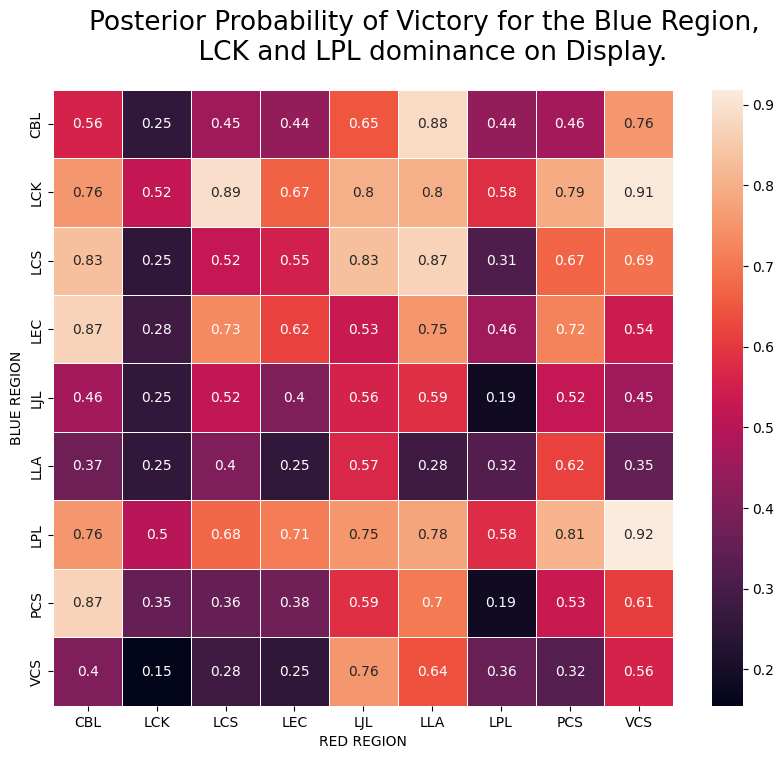

In [12]:
data_posterior_blue_win = (hyperprior_a + data_blue_wincount_pivot) / (hyperprior_a + hyperprior_b + data_blue_total)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_posterior_blue_win,annot=True,linewidths=0.5)
fig.suptitle("Posterior Probability of Victory for the Blue Region, \n LCK and LPL dominance on Display.",size=19)
#data_posterior_blue_win

## Prefered Side: Calculate the Best side for each Region.

Now we have each team's Posterior Win-Rate on Blue, we can work out what side they should choose if given the choice. Simply they need to choose whatever is greater: their Blue win odds, or their opponent's Blue loss odds. We can see certain pairs of opponents who have particularly good win-rates against each other on Red, and so would be suited to choosing Red over Blue to have better chances of winning.

In [13]:
data_posterior_choose_blue = (data_posterior_blue_win>1-data_posterior_blue_win.T)*1
data_posterior_choose_blue

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS
BLUE REGION,,,,,,,,,
CBL,1,1,1,1,1,1,1,1,1
LCK,1,1,1,0,1,1,1,1,1
LCS,1,1,1,1,1,1,0,1,0
LEC,1,0,1,1,0,1,1,1,0
LJL,1,1,1,0,1,1,0,1,1
LLA,1,1,1,1,1,0,1,1,0
LPL,1,1,0,1,0,1,1,0,1
PCS,1,1,1,1,1,1,0,1,0
VCS,1,1,0,0,1,0,1,0,1


# Simulation Construction
Now while we have our estimated chance of a Region winning in a single game vs any other Region, that is not all that matters. Multiple best of 5 matches must be won in order to win a Worlds Championship. Our Simulation requires:

1) Some data structure for each team, bringing along the required information
2) Some functions for Matches returning the Winner of Match and taking in Side Selection and teams as input
3) Working out Side Selection, returning who chooses what
4) Choosing some form of Random generation (Seen above, numpy generator called rng has already been set)

Once we have the Teams set up, PlayIns, Swiss and Knockouts working in a isolated set, we can build them into a function each and cycle through (same for the historical tournament simulation). We can track where teams are knocked out as losing teams absolutely won't be called up again. We need to examine whether our process produces historically representative results, so constructing and testing our assumptions and process on some historically representative groups stage is vital. We need to check that the simulation we're running is representative of the real product. 


## Team Set-Up
We need some data structure for each team. We need to carry the name of the team and the Region it represents. Further, we need some kind match data structure to track scores, side selection and overall results. We're going to use Named Tuples to store each team, and match results. In the future, as we know who is competing at Worlds 2023 (as of Sep 11th 2023 we know all but the LCS/LEC Grudge Match), we can create all the teams that will make their appearance later in the year for the simulation.

Update 15th September: Track the equivalent Swiss stage Pool of the team for side selection at that stage.

In [14]:
# SetUp Many Many named tuples to carry data forwards in the loops
SetupTeam = namedtuple('Team', ['Region','Seed','Pool','Name'])
SetupTeamInMatch = namedtuple('TIM', ['TeamTuple','Score'])
SetupMatch = namedtuple('Game', ['Teams', 'Score', 'Winner', 'Loser'])

# PRINT output for example and testing in early stages!

# All 23 Teams (LEC4 and LCS4 must play in a qualifying series):
# MAJOR:
# LCK
LCK1 = SetupTeam(Region='LCK',Seed=1,Pool=1,Name='Gen.G')
LCK2 = SetupTeam(Region='LCK',Seed=2,Pool=2,Name='T1')
LCK3 = SetupTeam(Region='LCK',Seed=3,Pool=3,Name='KT Rolster')
LCK4 = SetupTeam(Region='LCK',Seed=4,Pool=4,Name='Dplus KIA')

#LPL
LPL1 = SetupTeam(Region='LPL',Seed=1,Pool=1,Name='JDG')
LPL2 = SetupTeam(Region='LPL',Seed=2,Pool=2,Name='BiliBili')
LPL3 = SetupTeam(Region='LPL',Seed=3,Pool=3,Name='LNG')
LPL4 = SetupTeam(Region='LPL',Seed=4,Pool=4,Name='Weibo')

#EMEA
LEC1 = SetupTeam(Region='LEC',Seed=1,Pool=1,Name='G2')
LEC2 = SetupTeam(Region='LEC',Seed=2,Pool=2,Name='Fnatic')
LEC3 = SetupTeam(Region='LEC',Seed=3,Pool=3,Name='MAD Lions')

#USA
LCS1 = SetupTeam(Region='LCS',Seed=1,Pool=1,Name='NRG')
LCS2 = SetupTeam(Region='LCS',Seed=2,Pool=2,Name='Cloud9')
LCS3 = SetupTeam(Region='LCS',Seed=3,Pool=3,Name='Team Liquid')

# MINOR:

#WQS (Grudge Match):
LEC4 = SetupTeam(Region='LEC',Seed=4,Pool=4,Name='BDS')
LCS4 = SetupTeam(Region='LCS',Seed=4,Pool=4,Name='GG')

#PCS
PCS1 = SetupTeam(Region='PCS',Seed=1,Pool=4,Name='PSG Talon')
PCS2 = SetupTeam(Region='PCS',Seed=2,Pool=4,Name='CTBC Flying Oyster') #What a goated name on god

#VCS
VCS1 = SetupTeam(Region='VCS',Seed=1,Pool=4,Name='GAM')
VCS2 = SetupTeam(Region='VCS',Seed=2,Pool=4,Name='Team Whales')

#LJL
LJL1 = SetupTeam(Region='LJL',Seed=1,Pool=4,Name='DetonatioN FocusMe')
#CBLOL
CBL1 = SetupTeam(Region='CBL',Seed=1,Pool=4,Name='LOUD')
#LLA
LLA1 = SetupTeam(Region='LLA',Seed=1,Pool=4,Name='Movistar R7')

## Single Game, Side Selection, Bo1, Bo3 and Bo5 Functions

We can return the namedtuple of the winning team to pass on the important info, and so long as we carry scoreline with the team info, it doesn't matter who gets assigned Win/Loss at each step. Let's bring a print variable to be able to print the events to check the side selection logic is logic-ing correctly, then use the print function to test a couple of best of 5's. We set the condition for Team 1 having side selection as >0.5 to futureproof the need to have coinflips for who gets to choose, where we can easily generate a random number between zero and one.

In [15]:
# REFERENCE LOOKS LIKE ---> data_posterior_blue_win[RED REGION][BLUE REGION]

def SideSelection(TeamChoosing,Opponent,prnt=False): 
    # WAY simpler way is to return the teams in the order they choose to play
    # Means we need Match Team Tuples to Carry Score aswell
    if data_posterior_choose_blue[Opponent.TeamTuple.Region][TeamChoosing.TeamTuple.Region] == 1: #DO THEY DESIRE THE BLUE?
        if prnt==True:
            print(str(TeamChoosing.TeamTuple.Name) + ' chooses Blue')
        return [TeamChoosing,Opponent]
    else:
        if prnt==True:
            print(str(TeamChoosing.TeamTuple.Name) + ' chooses Red')
        return [Opponent,TeamChoosing]

def PlayGame(BlueTIM,RedTIM,prnt=False):
    # ALWAYS return winner in position 0 -> that way we KNOW unless the loop ends that position 1 gets side selection!
    if rng.uniform() < data_posterior_blue_win[RedTIM.TeamTuple.Region][BlueTIM.TeamTuple.Region]:
        BlueTIM = SetupTeamInMatch(TeamTuple=BlueTIM.TeamTuple, Score=BlueTIM.Score + 1)
        if prnt==True:
            print(str(BlueTIM.TeamTuple.Name) + ' : ' + str(BlueTIM.Score) + '   |   ' + str(RedTIM.TeamTuple.Name) + ' : ' + str(RedTIM.Score))
        return([BlueTIM,RedTIM])
    else:
        RedTIM = SetupTeamInMatch(TeamTuple=RedTIM.TeamTuple, Score=RedTIM.Score + 1)
        if prnt==True:
            print(str(BlueTIM.TeamTuple.Name) + ' : ' + str(BlueTIM.Score) + '   |   ' + str(RedTIM.TeamTuple.Name) + ' : ' + str(RedTIM.Score))
        return([RedTIM,BlueTIM])


def Bo5(Team1, Team2, Team1SideSlection=1, prnt=False):
    # Set Up Named Tuple to carry Score with the Team
    # The losing team gets side selection, so if Team1SideSelection is True, then they need to start of "losing"
    if prnt==True:
        print('Bo5: ' + str(Team1.Name) + ' vs ' + str(Team2.Name))
    if Team1SideSlection>0.5:
        TIMlos = SetupTeamInMatch(TeamTuple=Team1, Score=0)
        TIMwin = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    else:
        TIMwin = SetupTeamInMatch(TeamTuple=Team1, Score=0)
        TIMlos = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    while np.max((TIMwin.Score,TIMlos.Score))<3:
        # Now we Play game with the Play Game list that holds the Blue/Red side info in positioning
        MatchList =SideSelection(TIMlos,TIMwin,prnt)
        TIMwin,TIMlos = PlayGame(BlueTIM=MatchList[0],RedTIM=MatchList[1],prnt=prnt) #Now Loser is in position zero
    if prnt==True:
        print(str(TIMwin.TeamTuple.Name) + ' Wins!')
    return(TIMwin,TIMlos)

def Bo3(Team1, Team2, Team1SideSlection=1, prnt=False):
    # Set Up Named Tuple to carry Score with the Team
    # The losing team gets side selection, so if Team1SideSelection is True, then they need to start of "losing"
    if prnt==True:
        print('Bo3: ' + str(Team1.Name) + ' vs ' + str(Team2.Name))
    if Team1SideSlection>0.5:
        TIMlos = SetupTeamInMatch(TeamTuple=Team1, Score=0)
        TIMwin = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    else:
        TIMwin = SetupTeamInMatch(TeamTuple=Team1, Score=0)
        TIMlos = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    while np.max((TIMwin.Score,TIMlos.Score))<2:
        # Now we Play game with the Play Game list that holds the Blue/Red side info in positioning
        MatchList =SideSelection(TIMlos,TIMwin,prnt)
        TIMwin,TIMlos = PlayGame(BlueTIM=MatchList[0],RedTIM=MatchList[1],prnt=prnt) #Now Loser is in position zero
    if prnt==True:
        print(str(TIMwin.TeamTuple.Name) + ' Wins!')
    return(TIMwin,TIMlos)


def Bo1(Team1, Team2, Team1SideSlection=1, prnt=False):
    # Set Up Named Tuple to carry Score with the Team
    if prnt==True:
        print('Bo1: ' + str(Team1.Name) + ' vs ' + str(Team2.Name))
    TIMwin = SetupTeamInMatch(TeamTuple=Team1, Score=0)
    TIMlos = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    if Team1SideSlection>0.5:
        MatchList = SideSelection(TIMwin,TIMlos,prnt)
    else:
        MatchList = SideSelection(TIMlos,TIMwin,prnt)
    # Now we Play game with the Play Game list that holds the Blue/Red side info in positioning
    TIMwin,TIMlos = PlayGame(BlueTIM=MatchList[0],RedTIM=MatchList[1],prnt=prnt) #Now Loser is in position zero
    if prnt==True:
        print(str(TIMwin.TeamTuple.Name) + ' Wins!')
    return(TIMwin,TIMlos)

#-------------------------------------------------#
# Korea Heavy Favs - CHECK if the probability is working correctly. LCK should win 80% of the games here.
Bo5(LCK1, LJL1, Team1SideSlection=1, prnt=True)
Bo5(LCK2, LLA1, Team1SideSlection=1, prnt=True)
Bo5(LCK3, CBL1, Team1SideSlection=1, prnt=True)
Bo5(LCK4, PCS1, Team1SideSlection=1, prnt=True)

Bo5: Gen.G vs DetonatioN FocusMe
Gen.G chooses Blue
Gen.G : 0   |   DetonatioN FocusMe : 1
Gen.G chooses Blue
Gen.G : 1   |   DetonatioN FocusMe : 1
DetonatioN FocusMe chooses Blue
DetonatioN FocusMe : 2   |   Gen.G : 1
Gen.G chooses Blue
Gen.G : 2   |   DetonatioN FocusMe : 2
DetonatioN FocusMe chooses Blue
DetonatioN FocusMe : 3   |   Gen.G : 2
DetonatioN FocusMe Wins!
Bo5: T1 vs Movistar R7
T1 chooses Blue
T1 : 1   |   Movistar R7 : 0
Movistar R7 chooses Blue
Movistar R7 : 0   |   T1 : 2
Movistar R7 chooses Blue
Movistar R7 : 0   |   T1 : 3
T1 Wins!
Bo5: KT Rolster vs LOUD
KT Rolster chooses Blue
KT Rolster : 1   |   LOUD : 0
LOUD chooses Blue
LOUD : 1   |   KT Rolster : 1
KT Rolster chooses Blue
KT Rolster : 1   |   LOUD : 2
KT Rolster chooses Blue
KT Rolster : 2   |   LOUD : 2
LOUD chooses Blue
LOUD : 2   |   KT Rolster : 3
KT Rolster Wins!
Bo5: Dplus KIA vs PSG Talon
Dplus KIA chooses Blue
Dplus KIA : 1   |   PSG Talon : 0
PSG Talon chooses Blue
PSG Talon : 0   |   Dplus KIA : 2


(TIM(TeamTuple=Team(Region='LCK', Seed=4, Pool=4, Name='Dplus KIA'), Score=3),
 TIM(TeamTuple=Team(Region='PCS', Seed=1, Pool=4, Name='PSG Talon'), Score=0))

# Previous Tournament Structure - Do our Probabilities and Assumptions hold up?
In the past, Riot has had several variants of their Worlds tournament structures. Broadly there were 3 stages: Playins, Groups and Knockouts. The significant difference is Groups has now been switched for a Swiss structure. Let's test the old Format to check our method isn't absurd, which is a typical test to run when constructing a simulation for analysis. Issue is, some of the regions no longer exist, some existed at different points, and the play-ins seeding is significantly different. Therefore, we're going to make some assumptions and run a test simulation of the old Groups and Knock-outs. Knockouts were a top-8 single elimination best of 5 bracket, and Groups consisted of 4 groups (A,B,C,D) of 4 teams, drawn from 3 pools of teams, with a requirement for no duplicate regions within each group. Each Pool would compete in a double round robin Best of 1 bracket, so each team fought each other on both Blue and Red side, where the top two advance as 1st and 2nd Seeds from that group. We want to construct some Pools that are historically accurate, and since I'm a Bias EU fan, let's pick the structure and teams from 2019, where the Pools were:

1) The Groups Pool 1 consisted of the four 1st Seeds from the LCK1, LPL1, LEC1 and LCS1
2) The Groups Pool 2 consisted of 8 teams. LCK2, LEC2, LCS2, LPL2, LPL3, VCS1, PCS1, PCS2
3) The Groups Pool 3 consisted of the 4 teams advancing from the previous PlayIns structure. As the strongest teams we have available to us *on paper* (Looking at you MAD Lions, League fans will understand), we look to seed in LCK3, LEC3, LCS3 and VCS2 from the historical PlayIns bracket. 

This would give us a reasonable set of historical teams entering groups, and we can see via simulation if this histoircal group sim lines up roughly with our past reality. Output is suppressed and we skip the example to jump straight to the functions to speed through this to be able to test the method.
## Old Format - Seed the Groups
We seed 4 pools, popping in one first seed, two second seeds and one third seed. We then check if we have a legal permutation of groups before moving on.

In [16]:
def Old_Format_Groups_Seed(Pool1,Pool2,Pool3):
    # If there are duplicate regions in eitehr side of the bracket, just try again. The computational time lost is tiny vs human time to code the checks up
    region_check=0
    while region_check==0:
        # Set the condition to Escape UNLESS there is an issue (duplicate regions)
        region_check=1
        # Set Up the Pools
        groups_pool_1 = Pool1.copy()#[LCK1,LPL1,LEC1,LCS1]
        groups_pool_2 = Pool2.copy()#[LCK2,LPL2,LPL3,LEC2,LCS2,PCS1,PCS2,VCS1]
        groups_pool_3 = Pool3.copy()#[LCK3,LEC3,LCS3,VCS2]
        # Seed the Groups - Pop Out teams from the pools.
        group_A = [groups_pool_1.pop(rng.integers(0,len(groups_pool_1))),groups_pool_2.pop(rng.integers(0,len(groups_pool_2))),groups_pool_2.pop(rng.integers(0,len(groups_pool_2))),groups_pool_3.pop(rng.integers(0,len(groups_pool_3)))]
        group_B = [groups_pool_1.pop(rng.integers(0,len(groups_pool_1))),groups_pool_2.pop(rng.integers(0,len(groups_pool_2))),groups_pool_2.pop(rng.integers(0,len(groups_pool_2))),groups_pool_3.pop(rng.integers(0,len(groups_pool_3)))]
        group_C = [groups_pool_1.pop(rng.integers(0,len(groups_pool_1))),groups_pool_2.pop(rng.integers(0,len(groups_pool_2))),groups_pool_2.pop(rng.integers(0,len(groups_pool_2))),groups_pool_3.pop(rng.integers(0,len(groups_pool_3)))]
        group_D = [groups_pool_1.pop(rng.integers(0,len(groups_pool_1))),groups_pool_2.pop(rng.integers(0,len(groups_pool_2))),groups_pool_2.pop(rng.integers(0,len(groups_pool_2))),groups_pool_3.pop(rng.integers(0,len(groups_pool_3)))]
        # Need to build a list and check unique value count for Regions
        for bracket in [group_A,group_B,group_C,group_D]:
            regionlist = []
            for team in bracket:
                regionlist.append(team.Region)
            if len(np.unique(regionlist)) != 4:
                region_check=0
    # We return 4 groups of 4 teams
    return [group_A,group_B,group_C,group_D]

# ---------------------------- #
    # Choose Groups
Old_Format_Groups = Old_Format_Groups_Seed(Pool1=[LCK1,LPL1,LEC1,LCS1],
                                           Pool2=[LCK2, LEC2, LCS2, LPL2, LPL3, VCS1, PCS1, PCS2],
                                           Pool3=[LCK3, LEC3, LCS3, VCS2])
    # Test Group A 1st seed vs 2nd Seed
Bo1(Old_Format_Groups[0][0], Old_Format_Groups[0][1], Team1SideSlection=1, prnt=True)

Bo1: JDG vs Cloud9
JDG chooses Red
Cloud9 : 0   |   JDG : 1
JDG Wins!


(TIM(TeamTuple=Team(Region='LPL', Seed=1, Pool=1, Name='JDG'), Score=1),
 TIM(TeamTuple=Team(Region='LCS', Seed=2, Pool=2, Name='Cloud9'), Score=0))

## Old Format - Run Groups
In order to use the same data structure that we set up for the simulation for the new structure, we need to bring along an extra piece of information. Until now, we've not needed to track wins outside of an isolated best of 5 (only *who* wins), so we will set up a scoring array to track match results, checking for ties, and resolving any ties that occur following specific tie-breaker rules. The best performing team exits the group stage as the 1st seed from their group, and the runner up exits as 2nd seed. In tie-breaker matches, side selection was given to the team with the lower average victory time (https://www.esportsbets.com/league-of-legends/worlds/rules, accessed 3rd September 2023 - note: I couldn't find a Riot source for the old groups tie-breaker rules format), but we don't simulate match time, we will decide side selection via a coinflip. This is not a perfect simulation as we are not tracking head to head results, which for certain tie-breaker scenarios would create more situations to track, and we're using a simplification here as ~~Worlds is around the corner (29th September 2023)~~ we're almost at the Main stage (17th October 2023). The logic we need to consider follows:

* If there are two highest scoring teams with unique scores, we select them accordingly
* If there are two highest scoring teams with non-unique score, we need to play a tie-breaker match to determine 1st and 2nd seeds
* If there is a highest scoring team with a unqiue score and two teams tied for runner up, the runner up teams must play a tie-breaker for 2nd seed
* If there are three highest scoring teams sharing the same score, they would be seeded into a tie-breaker bracket. The team with a buy would usually be the team with the lowest average game time in their victories, however as we do not simulate game time, the team with a buy will be selected at random, and therefore will receive side selection in their match as they have been chosen to have the lowest average game time
* If there is a highest scoring team with a unique score and the other three teams share the same lowest score, they would be seeded into a tie-breaker bracket for runner up. The team with a buy would usually be the team with the lowest average game time in their victories, however as we do not simulate game time, the team with a buy will be selected at random, therefore will recieve side selection in their match as they have been chosen to have the lowest average game time
* If all 4 teams share the same scoreline, then they are seeded into a single elimination bracket with seeding decided by victory time. We will randomly seed the 4 teams into the single elimination bracket with 1st and 2nd Seeds awarded to the Winners and Runners up of the bracket with side selection decided randomly


In [17]:
def Old_Groups_Run(old_list_of_groups):

    # Track WinCounts
    old_groups_win_tracker = np.zeros((4,4))
    # Cycle Through Groups
    all_group_ids = [0,1,2,3]
    # Pre-SetUp all the matches you need for each group between each of the 4 teams
    all_match_pairs = [[0,1],[1,0],[0,2],[0,2],[0,3],[3,0],
                    [1,2],[2,1],[1,3],[3,1],[2,3],[3,2]]
    # Play trhough each groups list of match pairs, sum up wins for each team. Dont mess with location.
    for group_id in all_group_ids:
        current_group = old_list_of_groups[group_id]
        for match_pair in all_match_pairs:
            old_groups_test_bo1 = Bo1(current_group[match_pair[0]], current_group[match_pair[1]], Team1SideSlection=1, prnt=False)
            if old_groups_test_bo1[0][0].Name == current_group[match_pair[0]].Name:
                old_groups_win_tracker[group_id,match_pair[0]] += 1
            else:
                old_groups_win_tracker[group_id,match_pair[1]] += 1
    # Couple the output with the teams to sort teams by score in rows
    return np.array((old_groups_win_tracker,old_list_of_groups))


In [18]:
def Old_Groups_Results_And_Tiebreakers(old_groups_results_table):
    # Set up winners
    old_group_winners_array = np.empty((4,2),dtype=object)
    # group id to test before we loop through
    for group_id in range(0,4):
        # Need to find the max
        old_sorted_group_results = old_groups_results_table[:,group_id,:][:,old_groups_results_table[:,group_id,:].argsort(axis=1)[0]]
        # Number of Highest Win Counts
        old_group_max_values = np.unique(old_sorted_group_results[0],return_counts=True)[1][-1]
        # First check if it is unique, then we can just grab the team, and get second best too
        if old_group_max_values==1:
            old_group_winners_array[group_id,0] = old_sorted_group_results[:,-1][1]
            # Same logic but with the Runners Up as we might have Tie-Breakers to do
            old_group_runnerup_values = np.unique(old_sorted_group_results[0],return_counts=True)[1][-2]
            if old_group_runnerup_values==1:
                old_group_winners_array[group_id,1] = old_sorted_group_results[:,-2][1]
            elif old_group_runnerup_values==2:
                 tiebreaker_runnerup_2, tiebreaker_2_runnerrunnerup = Bo1(old_sorted_group_results[:,-2][1], old_sorted_group_results[:,-3][1], Team1SideSlection=rng.random(), prnt=False)
                 old_group_winners_array[group_id,1] = tiebreaker_runnerup_2[0]
            elif old_group_runnerup_values==3:
                tiebreaker_runnerup_teams_3 = rng.choice(3,size=3,replace=False) #As [3] has already been seeded as winner and there are only 3 teams left lol
                tiebreaker_runnerup_3_winner, tiebreaker_runnerup_3_loser = Bo1(old_sorted_group_results[:,tiebreaker_runnerup_teams_3[0]][1],
                                                        old_sorted_group_results[:,tiebreaker_runnerup_teams_3[1]][1], Team1SideSlection=rng.random(), prnt=False)
                tiebreaker_3_runnerup, tiebreaker_3_runnerrunnerup = Bo1(old_sorted_group_results[:,tiebreaker_runnerup_teams_3[2]][1], tiebreaker_runnerup_3_winner[0], Team1SideSlection=1, prnt=False)
                old_group_winners_array[group_id,1] = tiebreaker_3_runnerup[0]
        # If there are two best teams, we run a tie breaker to decide who gets 1st and second seed, Side Selection decided by coinflip
        elif old_group_max_values==2:
            tiebreaker_2_seed1, tiebreaker_2_seed2 = Bo1(old_sorted_group_results[:,-1][1], old_sorted_group_results[:,-2][1], Team1SideSlection=rng.random(), prnt=False)
            old_group_winners_array[group_id,0], old_group_winners_array[group_id,1] = tiebreaker_2_seed1[0], tiebreaker_2_seed2[0]
        # If there are 3 best groups, two must play vs a finalist team. This is decided by game time which is something we don't simulate, so we must sample randomly
        # Use Choice to pick two and get the final poosition of the team that gets the buy
        elif old_group_max_values==3:
            tiebreaker_teams_3 = -1*(rng.choice(3,size=3,replace=False)+1) #Need to add 1 and *-1 as we're indexing in reverse
            tiebreaker_3_winner, tiebreaker_3_loser = Bo1(old_sorted_group_results[:,tiebreaker_teams_3[0]][1],
                                                        old_sorted_group_results[:,tiebreaker_teams_3[1]][1], Team1SideSlection=rng.random(), prnt=False)
            tiebreaker_3_seed1, tiebreaker_3_seed2 = Bo1(old_sorted_group_results[:,tiebreaker_teams_3[2]][1], tiebreaker_3_winner[0], Team1SideSlection=1, prnt=False)
            old_group_winners_array[group_id,0], old_group_winners_array[group_id,1] = tiebreaker_3_seed1[0], tiebreaker_3_seed2[0]
        elif old_group_max_values==4:
            tiebreaker_teams_4 = rng.choice(4,size=4,replace=False)
            tiebreaker_4a_winner, tiebreaker_4a_loser = Bo1(old_sorted_group_results[:,tiebreaker_teams_4[0]][1],
                                                        old_sorted_group_results[:,tiebreaker_teams_4[1]][1], Team1SideSlection=rng.random(), prnt=False)
            tiebreaker_4b_winner, tiebreaker_4b_loser = Bo1(old_sorted_group_results[:,tiebreaker_teams_4[2]][1],
                                                        old_sorted_group_results[:,tiebreaker_teams_4[3]][1], Team1SideSlection=rng.random(), prnt=False)
            tiebreaker_4_seed1, tiebreaker_4_seed2 = Bo1(tiebreaker_4a_winner[0], tiebreaker_4b_winner[0], Team1SideSlection=rng.random(), prnt=False)
            old_group_winners_array[group_id,0], old_group_winners_array[group_id,1] = tiebreaker_4_seed1[0], tiebreaker_4_seed2[0]
    return old_group_winners_array                
        

In [19]:
old_groups_results_table = Old_Groups_Run(old_list_of_groups = Old_Format_Groups)
old_groups_winners = Old_Groups_Results_And_Tiebreakers(old_groups_results_table)
# For the notebook
pd.DataFrame(old_groups_winners, columns=["1st Seed","2nd Seed"], index=["Group A","Group B","Group C","Group D"])

C:\Users\Jorda\AppData\Local\Temp\ipykernel_16252\4288264838.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array((old_groups_win_tracker,old_list_of_groups))


,1st Seed,2nd Seed
Group A,"(LCK, 3, 3, KT Rolster)","(LPL, 1, 1, JDG)"
Group B,"(LCK, 2, 2, T1)","(LEC, 3, 3, MAD Lions)"
Group C,"(LCK, 1, 1, Gen.G)","(LPL, 3, 3, LNG)"
Group D,"(LPL, 2, 2, BiliBili)","(LEC, 1, 1, G2)"


## Old Format - Seed and Run Knockouts

The successful 8 teams are finally seeded into a single elimination best of 5 bracket, where the only stipulations are that a 1st Seed team must face off against a 2nd Seed team in the quarter finals, and that teams from the same group cannot be seeded into the same half of the bracket. We will denote these halfs of the bracket A and B. We want to track where teams end up to record how many regions make which position. The higher seeds in the Quarter Finals get side selection, while side selection for the first match in the Semi Finals and Grand Finals is determined via coinflip.

In [20]:
def Old_Knockout_Bracket(old_groups_winners_array):
    # The first two entries will have seed 1 on side A and seed 2 on side B, the others will be placed visa versa.
    old_knockout_bracket_split = rng.choice(4,size=4,replace=False)
    # Therefore knockout A Runners up teams are in position 2 and 3
    old_knockout_A_runnersup = [old_groups_winners_array[old_knockout_bracket_split[2]][1],old_groups_winners_array[old_knockout_bracket_split[3]][1]]
    old_knockout_B_runnersup = [old_groups_winners_array[old_knockout_bracket_split[0]][1],old_groups_winners_array[old_knockout_bracket_split[1]][1]]

    # --- Quarter Finals --- #
    # Half A
    old_quarters_winner_A1, old_position_08 = Bo5(old_groups_winners_array[old_knockout_bracket_split[0]][0],
                                        old_knockout_A_runnersup.pop(rng.integers(0,len(old_knockout_A_runnersup))), Team1SideSlection=1, prnt=False)
    old_quarters_winner_A2, old_position_07 = Bo5(old_groups_winners_array[old_knockout_bracket_split[1]][0],
                                        old_knockout_A_runnersup.pop(rng.integers(0,len(old_knockout_A_runnersup))), Team1SideSlection=1, prnt=False)
    # Half B
    old_quarters_winner_B1, old_position_06 = Bo5(old_groups_winners_array[old_knockout_bracket_split[2]][0],
                                        old_knockout_B_runnersup.pop(rng.integers(0,len(old_knockout_B_runnersup))), Team1SideSlection=1, prnt=False)
    old_quarters_winner_B2, old_position_05 = Bo5(old_groups_winners_array[old_knockout_bracket_split[3]][0],
                                        old_knockout_B_runnersup.pop(rng.integers(0,len(old_knockout_B_runnersup))), Team1SideSlection=1, prnt=False)

    # --- Semi Finals --- #
    # Half A
    old_semis_winner_A1, old_position_04 = Bo5(old_quarters_winner_A1[0], old_quarters_winner_A2[0], Team1SideSlection=rng.random(), prnt=False)
    # Half B
    old_semis_winner_B1, old_position_03 = Bo5(old_quarters_winner_B1[0], old_quarters_winner_B2[0], Team1SideSlection=rng.random(), prnt=False)

    # --- Grand Finals --- #
    old_position_01, old_position_02 = Bo5(old_semis_winner_A1[0], old_semis_winner_B1[0], Team1SideSlection=rng.random(), prnt=False)
    # Results Vector #
    return[old_position_08[0],old_position_07[0],old_position_06[0],old_position_05[0],
           old_position_04[0],old_position_03[0],old_position_02[0],old_position_01[0]]

## Old Format - Tie Together the Sim
Now we just need to tie the simulation steps all together and create a results table to store the outcome of each sim. Pass a parameter for the simulation length and loop until golden brown.

In [21]:
def old_worlds_2019_sim(Sim_Length,
                        Pool1List=[LCK1,LPL1,LEC1,LCS1],
                        Pool2List=[LCK2, LEC2, LCS2, LPL2, LPL3, VCS1, PCS1, PCS2],
                        Pool3List=[LCK3, LEC3, LCS3, VCS2]):
        # Results Table, we're only tracking who makes it to the knockout stage
        results_table = np.zeros((8,Sim_Length), dtype=object)
        # Track Sim Length
        sim_length_count = 0
        while sim_length_count<Sim_Length:
            # Format the Groups via Function
            old_format_groups = Old_Format_Groups_Seed(Pool1=Pool1List, Pool2=Pool2List, Pool3=Pool3List)
            # Run all 12 games for each Group
            old_groups_results_table = Old_Groups_Run(old_list_of_groups=old_format_groups)
            # Run Tie Breakers and Get Winners and Runner up of each group
            old_groups_knockout_teams_array = Old_Groups_Results_And_Tiebreakers(old_groups_results_table=old_groups_results_table)
            # Run Knockouts, track who finished where
            Knockout_Placements = Old_Knockout_Bracket(old_groups_winners_array=old_groups_knockout_teams_array)
            # Store the Results in the results table
            results_table[:,sim_length_count] = [
            Knockout_Placements[7].Region,Knockout_Placements[6].Region,
            Knockout_Placements[5].Region,Knockout_Placements[4].Region,
            Knockout_Placements[3].Region,Knockout_Placements[2].Region,
            Knockout_Placements[1].Region,Knockout_Placements[0].Region]
            # Tick up the sim count
            sim_length_count +=1
        return results_table

## Old Format - Run the Sim and Organise Results
This simulation shouldn't need to be *that* long, as we don't have a great deal of teams and the simulation is rather short in steps (in the grand scheme of things), so it should be relatively safe to manually dictate the length of the sim (rather than simulate to some perceived equilibrium). We're going to do 10,000 Simulations of the old Worlds format to both benchmark and sanity test the approach, as this should run in a suitably short amount of time if one were to run this something akin to Google Colab. To extract the results we need to sum up each possible region in each position so we know the proportion of spots occupied by each region in that position (remember we're only tracking the position that teams were knocked out in). We'll achieve this by creating a list and populating one for each position, then cycle through each region and sum by name occurance.

In [22]:
# Set Generator for reproducible Sim 
rng = np.random.default_rng(101)
old_worlds_results_table = old_worlds_2019_sim(Sim_Length=10_000,
                               Pool1List=[LCK1,LPL1,LEC1,LCS1],
                               Pool2List=[LCK2, LEC2, LCS2, LPL2, LPL3, VCS1, PCS1, PCS2],
                               Pool3List=[LCK3, LEC3, LCS3, VCS2])
old_sim_results_pd = pd.DataFrame(old_worlds_results_table)
old_sim_results_pd

C:\Users\Jorda\AppData\Local\Temp\ipykernel_16252\4288264838.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array((old_groups_win_tracker,old_list_of_groups))


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,LCK,LCK,LEC,LPL,LPL,LCK,LCK,LCK,LCK,LCK,...,LCK,LCK,LCK,LCK,LCK,LCK,LCK,LCK,LPL,LPL
1,LPL,LPL,LPL,LCK,LEC,LPL,LPL,LEC,LPL,LCK,...,LCK,LPL,LCK,LPL,LPL,LPL,LPL,LPL,LCK,LCK
2,LCK,LCK,LEC,LEC,LCS,PCS,LCS,LCK,LCK,LEC,...,LPL,LPL,LCK,LCK,LCK,LCS,LCK,LEC,LCK,LEC
3,LPL,LCK,LCK,LCK,LCK,LCK,LEC,LPL,LPL,LCK,...,LPL,LCK,LEC,LCK,LPL,LCK,LCK,LCK,LCK,LCK
4,LCS,LCS,LCK,PCS,LPL,LCS,LCS,LCK,LPL,LEC,...,LEC,LCS,LPL,PCS,LPL,LEC,LCS,LEC,LEC,VCS
5,VCS,LPL,LCS,LCK,LPL,LCS,LPL,LEC,LEC,LPL,...,LEC,LEC,LEC,LPL,LCK,LPL,LEC,LCK,LEC,LCS
6,LCK,LEC,LCK,LCS,LCS,LCS,LPL,LPL,LCS,LCS,...,LCK,LCS,PCS,LEC,LEC,LCS,LPL,VCS,LPL,LCK
7,LEC,PCS,LEC,LPL,LEC,LCK,LCK,LCS,VCS,LPL,...,LPL,LCK,LCS,LPL,LCS,LCK,LPL,LCS,LCS,LPL


In [23]:
# Winners
old_list_of_all_global_regions = ['LCK','LPL','LEC','LCS','PCS','VCS']
old_position_count_01 = []
old_position_count_02 = []
old_position_count_03 = []
old_position_count_04 = []
old_position_count_05 = []
old_position_count_06 = []
old_position_count_07 = []
old_position_count_08 = []
# Cycle through each position, can use an i to track number
position_no = 0
for position_list in [old_position_count_01,
old_position_count_02,
old_position_count_03,
old_position_count_04,
old_position_count_05,
old_position_count_06,
old_position_count_07,
old_position_count_08]:
    for region in old_list_of_all_global_regions:
        position_list.append(sum(old_sim_results_pd.loc(0)[position_no].str.count(region)))
    position_no +=1


## Old Format - Results
### What does our simulation say about the Winner of Worlds?
The headline estimate figures under the simulation are that there is an approximate 3% chance any Western team happens to be the one to win Worlds under the previous format, which as over the 8 and a half years of data used no Western team has won Worlds (but has come within a single best of 5 of winning), importantly holds up in line with reality. Of the 8 actual winners in the data set, 5 were from South Korea (62.5%) and 3 were from China (37.5%), with the simulation following a similar suit giving China 33.3% of all victories and South Korea 63.5%. Therefore, at least for the overall winner, the simulation appears to be a good historical reflection of reality. Plus, shout-out to the $6/10000$ scenarios where the PCS won!
### How about the Runners Up?
Naturally as the Runner-Up is easier to get to, our (the West's chances of making it that far) chances improve. Collectively we have about a 12% chance of being eliminated as the Runners-up. Historically we've occupied 2/8 (25%) of the runner-up positions, which at first glance makes the simulation appear to be understating the West's ability to reach the Finals. However, considering that there are very few historical observations (only 8 observed runners up), the simulated results are not an extreme divergence from history, and there is still a strong argument that the simulation is a fair representation of historic events. One could make the argument that one of these 2nd place positions was due to two Western teams meeting in the semi-finals (a very rare event, guaranteeing a Western top two position), and therefore the correct historic percentage should be the number of times a Western team has defeated an Eastern team in the semi finals (G2 in 2019 is the only historical example, giving 12.5% observed vs 12% simulated estimate). This is not to make comment on how strong Fnatic 2018 were in comparison to their peers at the time, but it is accurate to say they had a semi-finals opponent that was not from one of the two strongest regions. At the time, Fnatic were considered to potentially be the best Western team we had ever sent as a representative, and they finished their group as the 1st seed, winning against Invictus Gaming (the eventual winners) in their tie-breaker match when qualifying out of groups. 

In total, Korea occupy 5/8 Semi-Final finishes, Europe 2/8 and China 1/8. Therefore proportionally for total Finals appearances, Korea occupy 10/16 slots (62.5% vs a simulated 55.7%), China 4/16 (25% vs a simulated 36.4%) and Europe 2/16 (12.5% vs a simulated 6.3%) as shown in the 3rd figure. **It is an important nuance to highlight that these are the probabilities any one finals slot is filled by a respective team and not he chance of seeing a Western team in the finals.** There are two finals slots in each Worlds. This is an excellent example of the dangers of only looking at proportionality when comparing states, and when we should be considering proportionality of each simulation (figure 3). It is still important to review these proportions for considering if our simulation is historically representative, but need to be considered in the appropriate context for any analysis.

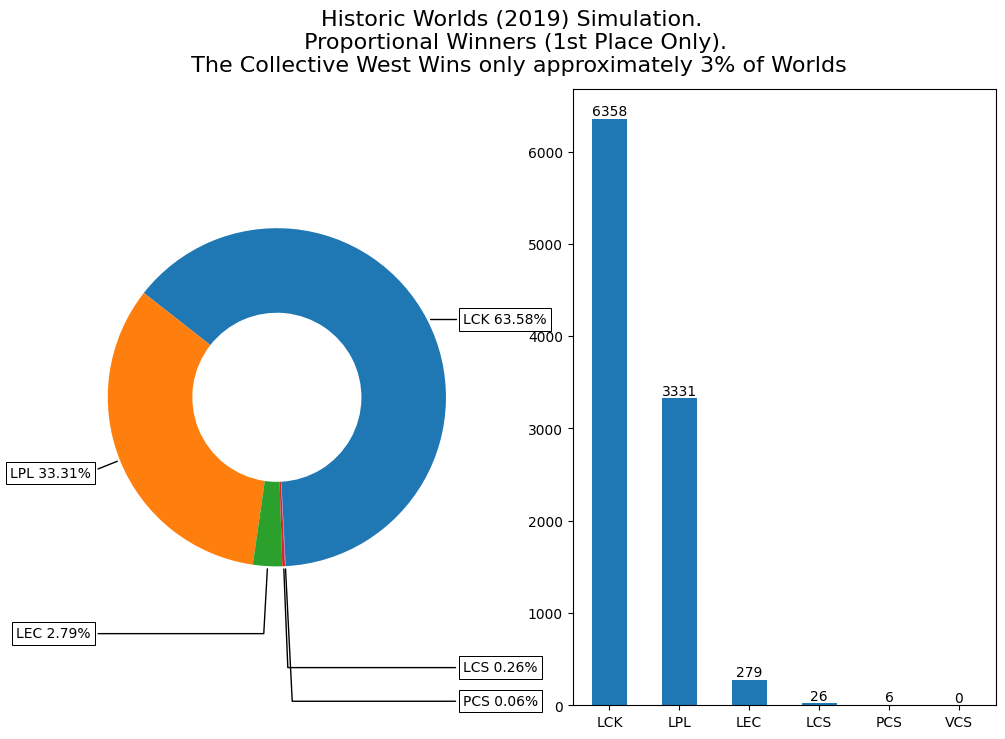

In [24]:
donutdata = old_position_count_01
percent_strings = []
for data in donutdata[:5]:
    percent_strings.append(str(100*data/sum(donutdata))+"%")

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12, 8))#, subplot_kw=dict(aspect="equal"))

wedges, texts = ax1.pie(donutdata[:5], wedgeprops=dict(width=0.5), startangle=-87)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(str(old_list_of_all_global_regions[i])+" "+percent_strings[i], xy=(x, y), xytext=(1.1*np.sign(x), (i*0.2+1)*y),
                horizontalalignment=horizontalalignment, **kw)

count = ax2.bar(old_list_of_all_global_regions,donutdata, width=0.5)
ax2.bar_label(count,label_type="edge")

fig.suptitle("Historic Worlds (2019) Simulation. \n Proportional Winners (1st Place Only). \n The Collective West Wins only approximately 3% of Worlds", size=16)

plt.show()

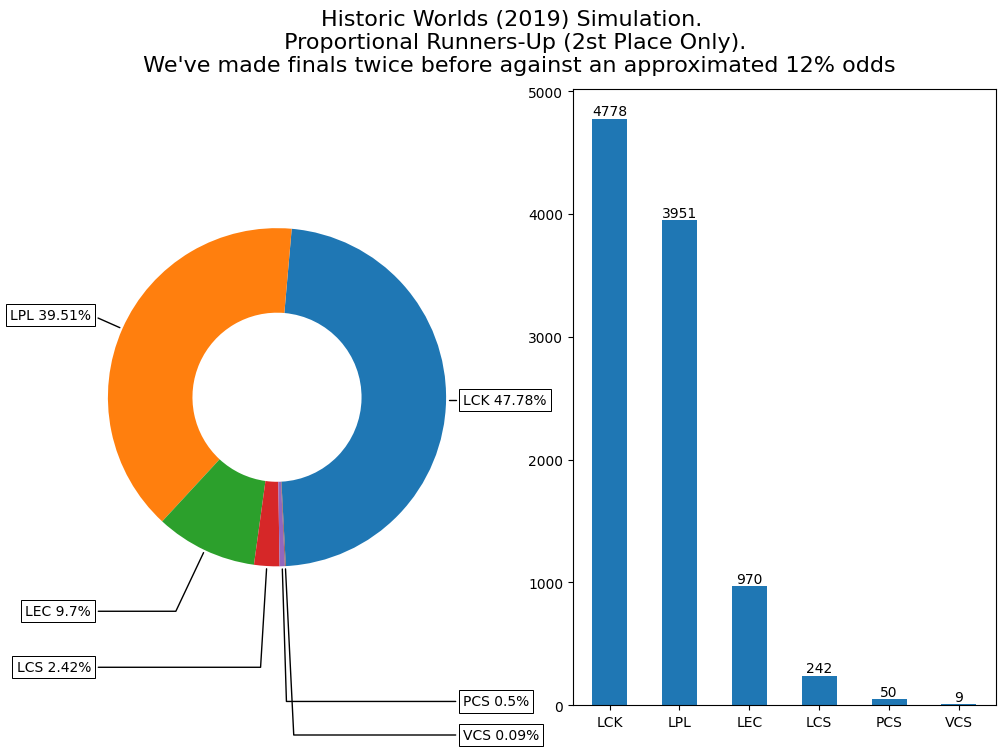

In [25]:
donutdata = old_position_count_02
percent_strings = []
for data in donutdata[:6]:
    percent_strings.append(str(100*data/sum(donutdata))+"%")

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12, 8))#, subplot_kw=dict(aspect="equal"))

wedges, texts = ax1.pie(donutdata[:6], wedgeprops=dict(width=0.5), startangle=-87)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(str(old_list_of_all_global_regions[i])+" "+percent_strings[i], xy=(x, y), xytext=(1.1*np.sign(x), (i*0.2+1)*y),
                horizontalalignment=horizontalalignment, **kw)

count = ax2.bar(old_list_of_all_global_regions,donutdata, width=0.5)
ax2.bar_label(count,label_type="edge")

fig.suptitle("Historic Worlds (2019) Simulation. \n Proportional Runners-Up (2st Place Only). \n We've made finals twice before against an approximated 12% odds", size=16)

plt.show()

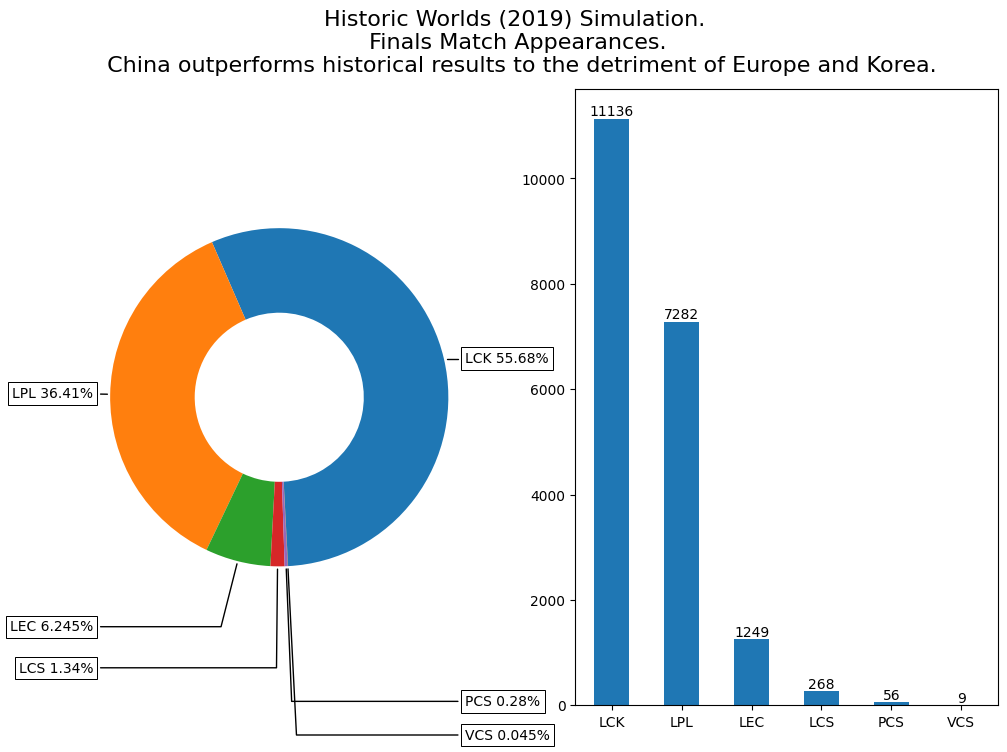

In [26]:
donutdata = np.array(old_position_count_01)+np.array(old_position_count_02)
percent_strings = []
for data in donutdata[:6]:
    percent_strings.append(str(100*data/sum(donutdata))+"%")

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12, 8))#, subplot_kw=dict(aspect="equal"))

wedges, texts = ax1.pie(donutdata[:6], wedgeprops=dict(width=0.5), startangle=-87)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(str(old_list_of_all_global_regions[i])+" "+percent_strings[i], xy=(x, y), xytext=(1.1*np.sign(x), (i*0.2+1)*y),
                horizontalalignment=horizontalalignment, **kw)

count = ax2.bar(old_list_of_all_global_regions,donutdata, width=0.5)
ax2.bar_label(count,label_type="edge")

fig.suptitle("Historic Worlds (2019) Simulation. \n Finals Match Appearances. \n China outperforms historical results to the detriment of Europe and Korea.", size=16)

plt.show()

### And Who makes it through Groups?
Ultimately what we care about is who makes it through groups, after all this is where the major change lies, and any impact from it will have knock-on effects on the chances a region makes it to the finals. While the seeding is different between the historic and new formats, one could argue a significant proportion of the change will come simply from the number of teams from different regions who make it past each stage irrespective of seed. Therefore, as a final figure for comparason, we look to compare the expected number of Western teams who atleast appear in the knockout bracket.

While we see that collectively China and Korea occupy ~63% of total spots, the West ~30%, and Minor Regions ~6.5%, we won't lingure here too long. As we will see in the next point, even though the West occupy about 30% of any one slot in groups, this actually translates to the West appearing in atleast 99% of knockout stage brackets with atleast one team! Those of you quick at probability might even work out that as there are eight spaces available, if the probability independent of anything else of a Western team is 30%, then $(1-0.3)^{8} \approx 0.05$, which is close but significantly not close enough to the 1% implied by the simulation. Why? 

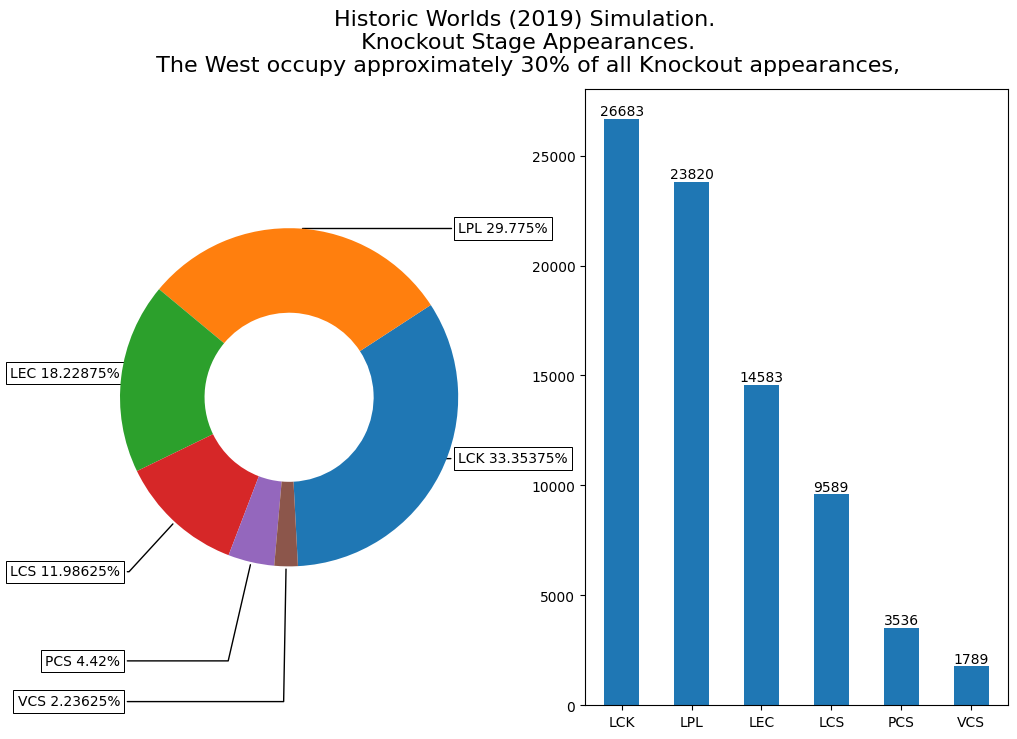

In [27]:
donutdata = (np.array(old_position_count_01) + np.array(old_position_count_02) +
              np.array(old_position_count_03) + np.array(old_position_count_04) +
                np.array(old_position_count_05) + np.array(old_position_count_06) + 
                np.array(old_position_count_07) + np.array(old_position_count_08))
percent_strings = []
for data in donutdata[:6]:
    percent_strings.append(str(100*data/sum(donutdata))+"%")

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12, 8))#, subplot_kw=dict(aspect="equal"))

wedges, texts = ax1.pie(donutdata[:6], wedgeprops=dict(width=0.5), startangle=-87)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(str(old_list_of_all_global_regions[i])+" "+percent_strings[i], xy=(x, y), xytext=(np.sign(x), (i*0.2+0.8)*y),
                horizontalalignment=horizontalalignment, **kw)

count = ax2.bar(old_list_of_all_global_regions,donutdata, width=0.5)
ax2.bar_label(count,label_type="edge")

fig.suptitle("Historic Worlds (2019) Simulation. \n Knockout Stage Appearances. \n The West occupy approximately 30% of all Knockout appearances, ", size=16)

plt.show()

### Finally (and most importantly), what about the number of scenarios where no-one qualifies?
Arguably more imporant is the number of simulated tournaments where no Western team makes it to groups stage. To answer the question left at the end of the markdown above, as previous analysis looks at the proportion that a team appears in any randomly chosen position independent of other teams, we actually lose implicit information *about* those very teams. Worlds does not occur in a vaccume, and there are 16 teams all dependent on one another for positions. The reason why the probabilities are so different (5% vs 1% is a significant difference at this more extreme end of unlikely) is that for all six Western teams to fail to qualify through groups, other teams from minor regions must take their place. 

Here we look to evaluate the number of scenarios a team does not appear (for the Winners and Runners-up these are equivalent) the different levels of the knockout stage. We see that under the conditions set out the chance no Western team made it to groups is the approximate 1% referenced earlier. We also see how the chance of a Western team making it to Semi-Finals and the Finals drops drastically as the Western teams now have to win a best of 5 (most likely against either China or Korea) to advance. While we appear in nearly 15% of finals (comparative to our 12.5% occupancy rate of total collective finals positions, where the difference occurs when the West has two teams in the Final), the final 3% chance to bring home the Worlds trophy still holds from the begining of this analysis.

In [28]:
old_list_of_all_global_regions = ['LCK','LPL','LEC','LCS','PCS','VCS']
old_knockouts_appear  = pd.DataFrame(np.zeros((len(old_sim_results_pd.columns),len(old_list_of_all_global_regions))),columns=old_list_of_all_global_regions)
old_semis_appear = pd.DataFrame(np.zeros((len(old_sim_results_pd.columns),len(old_list_of_all_global_regions))),columns=old_list_of_all_global_regions)
old_finals_appear = pd.DataFrame(np.zeros((len(old_sim_results_pd.columns),len(old_list_of_all_global_regions))),columns=old_list_of_all_global_regions)
old_knockout_success, old_semis_success, old_finals_success = [], [], []


# Could do a loop to loop through the different tables OR use one big table but this is easier to read and works with changes to the oldsimresults.loc range
# Knockouts Stage (Top 8)
for region in old_list_of_all_global_regions:
    for i in range(len(old_sim_results_pd.columns)):
        old_knockouts_appear.loc[i,region] = sum(old_sim_results_pd.loc[:,i].str.count(region))
    old_knockout_success.append(sum(old_knockouts_appear.loc[:,region]>0))
old_knockout_success.append(sum(old_knockouts_appear.loc[:,['LEC','LCS']].sum(axis=1)>0))

# Semi Finals Appearances (Top 4)
for region in old_list_of_all_global_regions:
    for i in range(len(old_sim_results_pd.columns)):
        old_semis_appear.loc[i,region] = sum(old_sim_results_pd.loc[[0,1,2,3],i].str.count(region))
    old_semis_success.append(sum(old_semis_appear.loc[:,region]>0))
old_semis_success.append(sum(old_semis_appear.loc[:,['LEC','LCS']].sum(axis=1)>0))

# Finals Appearances (Top 2)
for region in old_list_of_all_global_regions:
    for i in range(len(old_sim_results_pd.columns)):
        old_finals_appear.loc[i,region] = sum(old_sim_results_pd.loc[[0,1],i].str.count(region))
    old_finals_success.append(sum(old_finals_appear.loc[:,region]>0))
old_finals_success.append(sum(old_finals_appear.loc[:,['LEC','LCS']].sum(axis=1)>0))

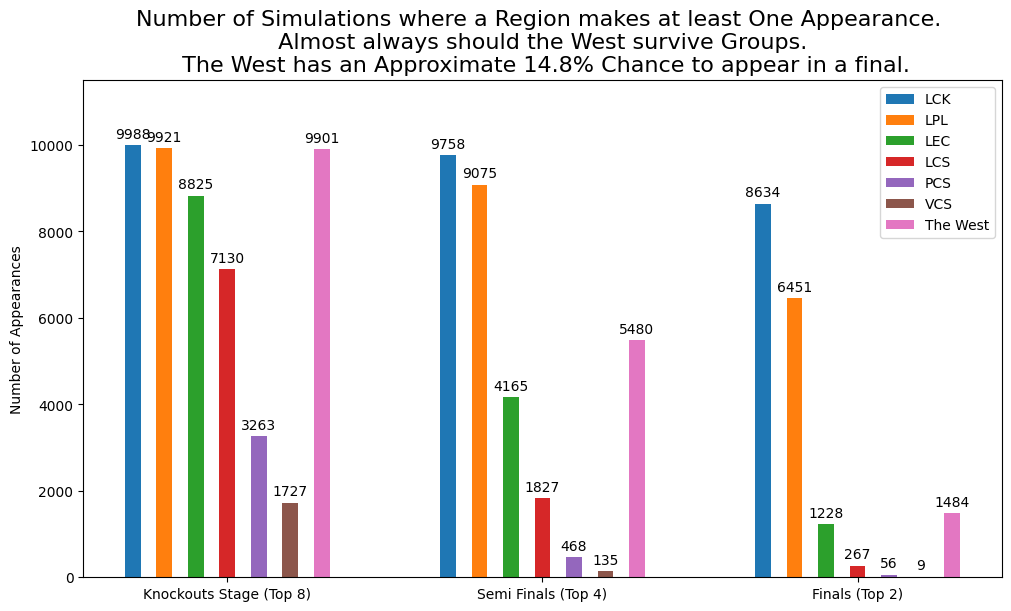

In [29]:
# Grouped Bar Chart of the number of times a region appears atleast once
old_position_names_list = ("Knockouts Stage (Top 8)", "Semi Finals (Top 4)", "Finals (Top 2)")
old_successful_appearences_key_is_team = {}
for i in range(len(old_list_of_all_global_regions)):
    old_successful_appearences_key_is_team[old_list_of_all_global_regions[i]] = (old_knockout_success[i], old_semis_success[i], old_finals_success[i])
old_successful_appearences_key_is_team['The West'] = (old_knockout_success[-1], old_semis_success[-1], old_finals_success[-1])

label_location = np.arange(len(old_position_names_list))*20-5  # the label locations
width = 1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))

for attribute, measurement in old_successful_appearences_key_is_team.items():
    offset = width * multiplier
    rects = ax.bar(label_location + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 2

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Appearances')
ax.set_title('Number of Simulations where a Region makes at least One Appearance. \n Almost always should the West survive Groups. \n The West has an Approximate 14.8% Chance to appear in a final.', size=16)
ax.set_xticks(label_location+6, old_position_names_list)
ax.legend(loc='upper right')
ax.set_ylim(0,11500)

plt.show()

## Old Format Critque - Improved Resolution

One significant critisism of the simulation for the historic format is that we no longer live in 2019. We live in 2023, and it should be compaired to either 2022's format or an estimate of what 2023 would have looked like without the Swiss format. While comparing historic to a suitable simulation for historic representation to perform a sanity check, when analysing the impact of the Swiss format we should consider what this years tournament might have looked like. For example the important difference between 2019 and a potential 2023 'Swissless' format is the inclusion of a 4th LCK and LPL seed, which as we have idenitified from the 2019 simulation, will likely have a hugely significant impact on the results as the difference between the proportional 30% of knockouts slots and 99% chance to not miss knockouts changes drastically if there could be all LPL and LCK teams. Therefore, we run an estimated 2023 groups-without-swiss stage simulation that relys heavily on the 2022 Worlds format. While the draw rules were slightly different with 4 pools rather than 3, because we do not consider the strength of each seed, there is no impact on the simulation.

Worlds 2022 saw 4 LPL teams, 4 LCK teams, 4 LEC teams, 3 LCS teams, 2 PCS, 2 VCS, 1 LLA, 1 LJL, 1 CBL, 1 LCO (Oceania) and 1 TCL (Turkey). For our Worlds 2023 without Swiss simulation, we follow Worlds 2022 with 3 LCK, 3 LPL, 2 LEC, 2 LCS, 1 PCS and 1 VCS teams automatically seeded into the groups stage, and will further seed the 4th LCK and LPL seeds, 3rd LEC and LCS seeds (as those are the teams that passed the 2022 play-ins stage). We will run the simulation and report the same as the historic simulation, but only the finals and the proportions (as argued above, these are the important two results).

We see that while we estimated the West to win about 3% of Worlds under the 2019 rules, with an estimated Swissless 2023 Worlds structure we only estimate a chance of 1.4% of a Western team winning the tournament. Further, we see how the probability of a Western team appearing at any stage in the knockouts has dropped significantly, with there now being a 10% no Western team makes knockouts, and only an approximate 6.8% chance of a Western team making a finals appearance. As expected China and Korea are effectively necessary to appear in the knockout stage, with approximate 91% and 99% odds to make it to semi-finals, and a further 89% and 64% odds to have a team appear in the finals. Ultimately, when considering a deep run at worlds as a team from the West making it to the finals, the addition of a 4th seed from the LPL and LEC more then halfed the Western chance.

In [30]:
# Set Generator for reproducible Sim 
rng = np.random.default_rng(101)
# New set of 3 pools for 2023
swissless_sim_results_pd = old_worlds_2019_sim(Sim_Length=10_000,
                               Pool1List=[LCK1, LPL1, LEC1, LCS1],
                               Pool2List=[LCK2, LCK3, LEC2, LCS2, LPL2, LPL3, VCS1, PCS1],
                               Pool3List=[LCK4, LEC3, LCS3, LPL4])
swissless_worlds_results_table_sim_results_pd = pd.DataFrame(swissless_sim_results_pd)
# Only Counting the winner, can re-use the "old_list_of_all_global_regions = ['LCK','LPL','LEC','LCS','PCS','VCS']""
swissless_position_count_01 = []
for region in old_list_of_all_global_regions:
        swissless_position_count_01.append(sum(swissless_worlds_results_table_sim_results_pd.loc(0)[0].str.count(region)))
# Get the appearence by simulation for each Region as above
swissless_knockouts_appear  = pd.DataFrame(np.zeros((len(swissless_worlds_results_table_sim_results_pd.columns),len(old_list_of_all_global_regions))),columns=old_list_of_all_global_regions)
swissless_semis_appear = pd.DataFrame(np.zeros((len(swissless_worlds_results_table_sim_results_pd.columns),len(old_list_of_all_global_regions))),columns=old_list_of_all_global_regions)
swissless_finals_appear = pd.DataFrame(np.zeros((len(swissless_worlds_results_table_sim_results_pd.columns),len(old_list_of_all_global_regions))),columns=old_list_of_all_global_regions)
swissless_knockout_success, swissless_semis_success, swissless_finals_success = [], [], []


# Could do a loop to loop through the different tables OR use one big table but this is easier to read and works with changes to the oldsimresults.loc range
# Knockouts Stage (Top 8)
for region in old_list_of_all_global_regions:
    for i in range(len(swissless_worlds_results_table_sim_results_pd.columns)):
        swissless_knockouts_appear.loc[i,region] = sum(swissless_worlds_results_table_sim_results_pd.loc[:,i].str.count(region))
    swissless_knockout_success.append(sum(swissless_knockouts_appear.loc[:,region]>0))
swissless_knockout_success.append(sum(swissless_knockouts_appear.loc[:,['LEC','LCS']].sum(axis=1)>0))

# Semi Finals Appearances (Top 4)
for region in old_list_of_all_global_regions:
    for i in range(len(swissless_worlds_results_table_sim_results_pd.columns)):
        swissless_semis_appear.loc[i,region] = sum(swissless_worlds_results_table_sim_results_pd.loc[[0,1,2,3],i].str.count(region))
    swissless_semis_success.append(sum(swissless_semis_appear.loc[:,region]>0))
swissless_semis_success.append(sum(swissless_semis_appear.loc[:,['LEC','LCS']].sum(axis=1)>0))

# Finals Appearances (Top 2)
for region in old_list_of_all_global_regions:
    for i in range(len(swissless_worlds_results_table_sim_results_pd.columns)):
        swissless_finals_appear.loc[i,region] = sum(swissless_worlds_results_table_sim_results_pd.loc[[0,1],i].str.count(region))
    swissless_finals_success.append(sum(swissless_finals_appear.loc[:,region]>0))
swissless_finals_success.append(sum(swissless_finals_appear.loc[:,['LEC','LCS']].sum(axis=1)>0))

C:\Users\Jorda\AppData\Local\Temp\ipykernel_16252\4288264838.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array((old_groups_win_tracker,old_list_of_groups))


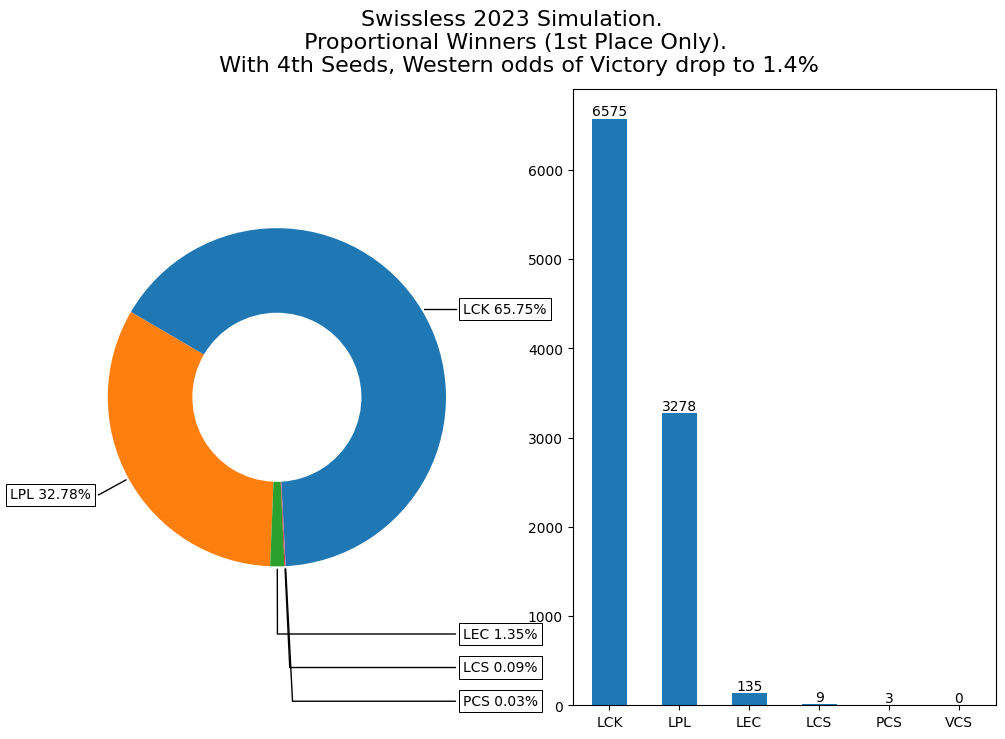

In [37]:
donutdata = swissless_position_count_01
percent_strings = []
for data in donutdata[:5]:
    percent_strings.append(str(100*data/sum(donutdata))+"%")

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12, 8))#, subplot_kw=dict(aspect="equal"))

wedges, texts = ax1.pie(donutdata[:5], wedgeprops=dict(width=0.5), startangle=-87)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate((str(old_list_of_all_global_regions[i])+" "+percent_strings[i]), xy=(x, y), xytext=(1.1*np.sign(x), (i*0.2+1)*y),
                horizontalalignment=horizontalalignment, **kw)

count = ax2.bar(old_list_of_all_global_regions,donutdata, width=0.5)
ax2.bar_label(count,label_type="edge")

fig.suptitle("Swissless 2023 Simulation. \n Proportional Winners (1st Place Only). \n With 4th Seeds, Western odds of Victory drop to 1.4%", size=16)

plt.show()

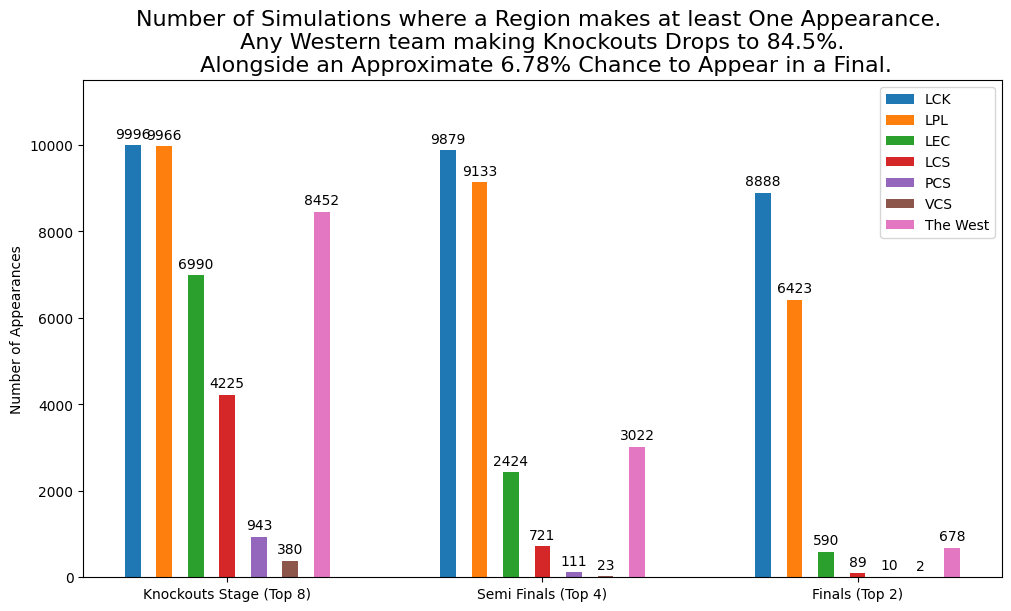

In [38]:
# Grouped Bar Chart of the number of times a region appears atleast once
old_position_names_list = ("Knockouts Stage (Top 8)", "Semi Finals (Top 4)", "Finals (Top 2)")
swissless_successful_appearences_key_is_team = {}
for i in range(len(old_list_of_all_global_regions)):
    swissless_successful_appearences_key_is_team[old_list_of_all_global_regions[i]] = (swissless_knockout_success[i], swissless_semis_success[i], swissless_finals_success[i])
swissless_successful_appearences_key_is_team['The West'] = (swissless_knockout_success[-1], swissless_semis_success[-1], swissless_finals_success[-1])

label_location = np.arange(len(old_position_names_list))*20-5  # the label locations
width = 1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))

for attribute, measurement in swissless_successful_appearences_key_is_team.items():
    offset = width * multiplier
    rects = ax.bar(label_location + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 2

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Appearances')
ax.set_title('Number of Simulations where a Region makes at least One Appearance. \n Any Western team making Knockouts Drops to 84.5%. \n Alongside an Approximate 6.78% Chance to Appear in a Final.', size=16)
ax.set_xticks(label_location+6, old_position_names_list)
ax.legend(loc='upper right')
ax.set_ylim(0,11500)

plt.show()

# The New Tournament Structure
### Structure update 12 September 2023
Worlds 2023 primer was released (https://lolesports.com/article/worlds-2023-primer/blte9ec68c4b4f441fc) providing some more information into the Swiss and Bracket structure. Key information is that enterence into the Swiss stage is seeded into 4 pools. Pools are groups of 4, partitioned by Seeding. So the Pools are Seeds 1, Seeds 2, Seeds3 and Seeds4 + PlayIns teams. Further, in the first match-up, Pool 1 fights Pool 4 and Pool 2 fights Pool 3 where no team may play against their own region. In addition, through-out the Swiss bracket, the higher Pool will recieve side selection where possible. The structure has been updated to reflect this.

## Play-Ins
The PlayIns features 8 teams facing off in two double elimination Bo3 brackets that were drawn at random after the conclusion of the LEC finals on 10th September 2023, so the bracket order and placement of teams is known to us. However, we will sample the bracket randomly just as Riot has done in order to fully simulate a Worlds run under the current rules.

The 8 teams are seeded via two pools into the 2 double elimination brackets where two teams will qualify for the Swiss stage. The PlayIns concludes with the upper-bracket finalist from one bracket facing off against the lower-bracket finalist from the opposing bracket in a best of 5, victory in which will grant you attendence to the main stage. Seeding rules that we seed all Pool 1 teams (upper teir), then all Pool 2 (lower teir), where any team from the same Region must be in different brackets, and any team from the same Pool cannot face each other in the first round.

* Pool 1: PCS1 (PSG), PCS2 (CFO), VCS1 (GAM) & WQS Winner (LEC4 vs LCS4 in a Bo5)
* Pool 2: VCS2 (TW), LJL1 (DFM), LLA1 (R7) & CBL1 (LLL)

![An image showing the two sides of the bracket. VCS1 vs CBL1 & PCS1 vs LLA1 in one bracket, and VCS2 vs WQS & PCS2 vs LJL1 on the other.](PlayinsBracket.PNG)

Source: https://lol.fandom.com/wiki/2023_Season_World_Championship/Play-In, Accessed 13 Sep 2023.
### Bo5 For WQS and Setting Up the Teams into the PlayIns
First we need to find out the final Western representative, which is simply achieved by running a Bo5 between LEC4 and LCS4. We then need to constuct the PlayIns bracket. Then we need to structure the tournament, ideally keeping track of how far everyone makes it in the tournement. Because we want to keep track, it's probably a good idea to take this one round at a time, store the losing teams, and move on, rather than winner plays winner plays winner, etc.

In [29]:
# Worlds Qualifying Match
WQS1 = Bo5(LEC4, LCS4, Team1SideSlection=1, prnt=True)[0].TeamTuple # Just spotted this clear LEC BIAS in the example, but changing it changes the context later on and it doesnt really matter, the sim later is what matters.

# If there are duplicate regions in eitehr side of the bracket, just try again. The computational time lost is tiny vs human time to code the checks up
region_check=0
while region_check==0:
    # Set the condition to Escape UNLESS there is an issue (duplicate regions)
    region_check=1
    # Pools - Set up the two brackets
    playin_pool1 = [PCS1,PCS2,VCS1,WQS1]
    playin_pool2 = [VCS2,LJL1,LLA1,CBL1]
    # Pop two out from Pool1 and Pop two out from Pool2. Repeat for Bracket two so we have two empty pools and two full brackets
    playin_bracket1_round1 = [playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool2.pop(rng.integers(0,len(playin_pool2))),playin_pool2.pop(rng.integers(0,len(playin_pool2)))]
    playin_bracket2_round1 = [playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool1.pop(rng.integers(0,len(playin_pool1))),
                                playin_pool2.pop(rng.integers(0,len(playin_pool2))),playin_pool2.pop(rng.integers(0,len(playin_pool2)))]
    # Need to build a list and check unique value count for Regions
    for bracket in [playin_bracket1_round1,playin_bracket2_round1]:
        regionlist = []
        for team in bracket:
            regionlist.append(team.Region)
        if len(np.unique(regionlist)) != 4:
            region_check=0
        #print('borked list',regionlist)


Bo5: BDS vs GG
BDS chooses Blue
BDS : 0   |   GG : 1
BDS chooses Blue
BDS : 1   |   GG : 1
GG chooses Blue
GG : 2   |   BDS : 1
BDS chooses Blue
BDS : 2   |   GG : 2
GG chooses Blue
GG : 2   |   BDS : 3
BDS Wins!


### Running the Playins
As we run each game individually we can track who makes it were based on where teams lose, although this isn't going to be relivent till later. Right now, we care about getting this running to be able to get our two teams. Reminder that to access the team out of the match tuple it is Match[0][0] for [winner][team] or Match[1][0] for [loser][team]. AdmiIn hindsight absolutely not the most intuative way BUT it's very functional and carries all the info I might need. We identify the match teams following:
* Bracket Name (PlayIn)
* Bracket Number (B1 or B2)
* Round No,
* Upper/Lower Brackets
* Winner/Loser

In [30]:
# Match_BracketNo._RoundNo._IDNo.
# This is Round 1
PlayIn_B1_R1A_w, PlayIn_B1_R1A_l = Bo3(playin_bracket1_round1[0], playin_bracket1_round1[2], Team1SideSlection=rng.random(), prnt=True) #Randomly Sorted Pool1[0] and Pool2[0]
PlayIn_B1_R1B_w, PlayIn_B1_R1B_l = Bo3(playin_bracket1_round1[1], playin_bracket1_round1[3], Team1SideSlection=rng.random(), prnt=True) #Randomly Sorted Pool1[1] and Pool2[1]
PlayIn_B2_R1A_w, PlayIn_B2_R1A_l = Bo3(playin_bracket2_round1[0], playin_bracket2_round1[2], Team1SideSlection=rng.random(), prnt=True) #Randomly Sorted Pool1[2] and Pool2[2]
PlayIn_B2_R1B_w, PlayIn_B2_R1B_l = Bo3(playin_bracket2_round1[1], playin_bracket2_round1[3], Team1SideSlection=rng.random(), prnt=True) #Randomly Sorted Pool1[3] and Pool2[3]

# Round 2 - Upper and Lower Parts of the Bracket
# Winners are Match[0], Losers are Match[1]
PlayIn_B1_R2U_w, PlayIn_B1_R2U_l = Bo3(PlayIn_B1_R1A_w[0], PlayIn_B1_R1B_w[0], Team1SideSlection=rng.random(), prnt=True) #Winners of B1
PlayIn_B1_R2L_w, Position_22 = Bo3(PlayIn_B1_R1A_l[0], PlayIn_B1_R1B_l[0], Team1SideSlection=rng.random(), prnt=True) #Losers of B1
PlayIn_B2_R2U_w, PlayIn_B2_R2U_l = Bo3(PlayIn_B2_R1A_w[0], PlayIn_B2_R1B_w[0], Team1SideSlection=rng.random(), prnt=True) #Winners of B2
PlayIn_B2_R2L_w, Position_21 = Bo3(PlayIn_B2_R1A_l[0], PlayIn_B2_R1B_l[0], Team1SideSlection=rng.random(), prnt=True) #Losers of B2

# Round 3 - Loser Bracket Finals
# Losers of Upper Bracket Finals face off against Winner of the Lower Bracket Match of Round 2
PlayIn_B1_R3L_w, Position_20 = Bo3(PlayIn_B1_R2U_l[0], PlayIn_B1_R2L_w[0], Team1SideSlection=rng.random(), prnt=True) #Losers of B1R2 Upper vs Winners of B1R2 Lower
PlayIn_B2_R3L_w, Position_19 = Bo3(PlayIn_B2_R2U_l[0], PlayIn_B2_R2L_w[0], Team1SideSlection=rng.random(), prnt=True) #Losers of B2R2 Upper vs Winners of B2R2 Lower

# Round 4 - Qualification.
# Winners of Upper bracket Finals in R2 face Winner of Lower Bracket matches from R3 from Oppsite Brackets in a Bo5
Match_PlayInsQualifier1_w, Position_18 = Bo5(PlayIn_B1_R2U_w[0], PlayIn_B2_R3L_w[0], Team1SideSlection=rng.random(), prnt=True) #Winners of Upper B1R2 vs Winners of Lower B2R3
Match_PlayInsQualifier2_w, Position_17 = Bo5(PlayIn_B2_R2U_w[0], PlayIn_B1_R3L_w[0], Team1SideSlection=rng.random(), prnt=True) #Winners of Upper B2R2 vs Winners of Lower B1R3

PLY1 = Match_PlayInsQualifier1_w[0]
PLY2 = Match_PlayInsQualifier2_w[0]
print(PLY1)
print(PLY2)

Bo3: CTBC Flying Oyster vs LOUD
LOUD chooses Blue
LOUD : 0   |   CTBC Flying Oyster : 1
LOUD chooses Blue
LOUD : 1   |   CTBC Flying Oyster : 1
CTBC Flying Oyster chooses Blue
CTBC Flying Oyster : 2   |   LOUD : 1
CTBC Flying Oyster Wins!
Bo3: GAM vs Movistar R7
Movistar R7 chooses Red
GAM : 0   |   Movistar R7 : 1
GAM chooses Red
Movistar R7 : 1   |   GAM : 1
Movistar R7 chooses Red
GAM : 1   |   Movistar R7 : 2
Movistar R7 Wins!
Bo3: PSG Talon vs DetonatioN FocusMe
DetonatioN FocusMe chooses Blue
DetonatioN FocusMe : 1   |   PSG Talon : 0
PSG Talon chooses Blue
PSG Talon : 0   |   DetonatioN FocusMe : 2
DetonatioN FocusMe Wins!
Bo3: BDS vs Team Whales
BDS chooses Red
Team Whales : 0   |   BDS : 1
Team Whales chooses Red
BDS : 2   |   Team Whales : 0
BDS Wins!
Bo3: CTBC Flying Oyster vs Movistar R7
Movistar R7 chooses Blue
Movistar R7 : 1   |   CTBC Flying Oyster : 0
CTBC Flying Oyster chooses Blue
CTBC Flying Oyster : 1   |   Movistar R7 : 1
Movistar R7 chooses Blue
Movistar R7 : 2  

## Swiss Stage

### The 14 Seeds Starting in the Swiss Stage:
* The top 4 teams from LPL, LCK 
* The top 3 teams from LEC, LCS
* Two Winners of the PlayIns

The Swiss stage replaces the previous long-running groups stage and is the main element of study of the simulation. Teams in the Swiss stage will always face an opponent with an equivalent scoreline through-out (potentially) 5 round (The teams that Win in 3 or Lose in 3 round will only see those 3 rounds). For example in the second round, teams that lost their first match will only face off against other teams that also lost their first match. Teams play in a single Bo1 (which has massive implications for the impact of Blue-Side advantage) unless playing in a promotion (to the Final Bracket) or survival (lose and you're removed from the tournament) where they play a Bo3. The only Rules for Round1 construction is that teams must play against another team from a different Region.

![Image showing how 16 teams progress from a Best of 1 in round 1, thourgh the swiss stage playing matches vs other teams with the same score (0,1),(1,0) through to (2,0),(1,1),(0,2), etc., until they have 2 win or 2 loses, where they will now always player Best of 3 matchs. Winning 3 matches quaifies the team for the Finals Bracket, losing 3 removes you from the tournament.](SwissStage.jpg)

Source: https://lolesports.com/article/state-of-the-game-lol-esports-in-2023/blt5d3bca31d1b39e0c, Accessed 13th September 2023

### Setting Up the Teams into the Swiss Stage
Update 12th Sep 2023: Following the Primer, we now know how the teams are originally seeded into the Swiss bracket. Seeds 1 must fight a 4th Seed, and a 2nd Seed must fight a 3rd Seed, where seeds 1,2 and 3 are from their respective major regions, and 4th Seeds are LCK4, LPL4 and the two PlayIn winners. We need to update the Swiss Pre-Round Match setup to reflect this. One challenge is that we have set up the matches to effectively have random paths through-out the bracket directly because the original 8 matches were completely random. Now we need to match the pairs and then randomly allocate these pairs to matches. As we might have different seeds coming into the set via PlayIns, we will pre-sort the pools, rather than logic them in the bracket. This is just easier for our needs, although it means the code isn't flexible if we were to use this after another format change in a years time. Further, through-out the Swiss bracket, side selection is not random as I had first coded up, but is given to the higher Seeded team.

In [31]:
# Set the flag to run first time.
region_check=0
while region_check==0:
    # Assume we're going to pass and set check to 1, then go back into the loop if we get 'unlucky' in the pairs
    region_check=1
    # Reset the swiss list encase we gotta go through it again
    swiss_pool1 = [LCK1,LPL1,LEC1,LCS1]         
    swiss_pool2 = [LCK2,LPL2,LEC2,LCS2]
    swiss_pool3 = [LCK3,LPL3,LEC3,LCS3]
    swiss_pool4 = [LCK4,LPL4,PLY1,PLY2]
    # We need to pair these up then randomly seed the matches 1 through 8. Name these matches Pair seed X vs Seed Y, Number Z.
    # Pop-Out two random teams via choosing integer between 0 and Length of Swiss. Seems to Pop one at a time so Len updates after the first pop.
    pair14_1 = [swiss_pool1.pop(rng.integers(0,len(swiss_pool1))),swiss_pool4.pop(rng.integers(0,len(swiss_pool4)))]
    pair14_2 = [swiss_pool1.pop(rng.integers(0,len(swiss_pool1))),swiss_pool4.pop(rng.integers(0,len(swiss_pool4)))]
    pair14_3 = [swiss_pool1.pop(rng.integers(0,len(swiss_pool1))),swiss_pool4.pop(rng.integers(0,len(swiss_pool4)))]
    pair14_4 = [swiss_pool1.pop(rng.integers(0,len(swiss_pool1))),swiss_pool4.pop(rng.integers(0,len(swiss_pool4)))]
    pair23_1 = [swiss_pool2.pop(rng.integers(0,len(swiss_pool2))),swiss_pool3.pop(rng.integers(0,len(swiss_pool3)))]
    pair23_2 = [swiss_pool2.pop(rng.integers(0,len(swiss_pool2))),swiss_pool3.pop(rng.integers(0,len(swiss_pool3)))]
    pair23_3 = [swiss_pool2.pop(rng.integers(0,len(swiss_pool2))),swiss_pool3.pop(rng.integers(0,len(swiss_pool3)))]
    pair23_4 = [swiss_pool2.pop(rng.integers(0,len(swiss_pool2))),swiss_pool3.pop(rng.integers(0,len(swiss_pool3)))]
    # Check each Pair for teams from the same region. IF there are duplicate regions - change the flag and re-run the sample
    for pair in [pair14_1,pair14_2,pair14_3,pair14_4,
                pair23_1,pair23_2,pair23_3,pair23_4]:
        # IF check to redo the loop if there is match with teams from the same region.
        if pair[0].Region == pair[1].Region:
            region_check=0
            #print('Borked : ' + str(pair[0].Region) + ' vs ' + str(pair[1].Region))
# Finally, once we have our valid set of 8 matches, we need to randomly order these matches
swiss_sorted_matches = [pair14_1,pair14_2,pair14_3,pair14_4,pair23_1,pair23_2,pair23_3,pair23_4]
swiss_random_matches = [swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),
                        swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),
                        swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),
                        swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches)))]


### Side Selection Function

When creating the side selection function, we have 3 outcomes. Team1 is the higher seed, Team2 is the higher seed, or they are the same seed and therefore we need to randomly sample U(0,1) as we were doing. I'm going to set this up for an arbitary length list of matches incase I need it in the future, but likely I will just pass the playing pair of teams into the list within the function call to play the bo5. It won't be verbose in text but it will be easiest to get going and it will be readable. We can check it's working on the first set-up of Swiss matches, as the higher seeded teams (Pool 1 and Pool 2) are all Team1 from how we ordered the popping.

In [19]:
# MAKE sure when teams are put into this function they are in the form of [Team1,Team2]
def Swiss_Side_Selection_Vector(List_of_n_pairs_of_teams):
    # side selection in my code is if s>0.5, Team 1 get it, if s<0.5 then Team 2 get it. We have 
    side_selection_list = []
    for pair in List_of_n_pairs_of_teams:
        # IF T1 has Lower seed, T1 get SideSelection
        if pair[0].Pool < pair[1].Pool:
            side_selection_list.append(1)
        # IF T2 has Lower seed, T2 get SideSelection
        elif pair[0].Pool > pair[1].Pool:
            side_selection_list.append(0)
        # Else same seed, rng SideSelection
        else:
            side_selection_list.append(rng.random())
    return side_selection_list


def Swiss_Side_Selection_Single(Teams):
    # side selection in my code is if s>0.5, Team 1 get it, if s<0.5 then Team 2 get it. We have 
    # IF T1 has Lower seed, T1 get SideSelection
    if Teams[0].Pool < Teams[1].Pool:
        return 1
    # IF T2 has Lower seed, T2 get SideSelection
    elif Teams[0].Pool > Teams[1].Pool:
        return 0
    # Else same seed, rng SideSelection
    else:
        return rng.random()
    

### Let's Check the 1st round matchups to make sure the new system is running correctly

In [20]:
swiss_random_matches

[[Team(Region='LCS', Seed=1, Pool=1, Name='NRG'),
  Team(Region='LEC', Seed=4, Pool=4, Name='BDS')],
 [Team(Region='LPL', Seed=2, Pool=2, Name='BiliBili'),
  Team(Region='LEC', Seed=3, Pool=3, Name='MAD Lions')],
 [Team(Region='LEC', Seed=1, Pool=1, Name='G2'),
  Team(Region='LPL', Seed=4, Pool=4, Name='Weibo')],
 [Team(Region='LPL', Seed=1, Pool=1, Name='JDG'),
  Team(Region='LCK', Seed=4, Pool=4, Name='Dplus KIA')],
 [Team(Region='LEC', Seed=2, Pool=2, Name='Fnatic'),
  Team(Region='LCS', Seed=3, Pool=3, Name='Team Liquid')],
 [Team(Region='LCS', Seed=2, Pool=2, Name='Cloud9'),
  Team(Region='LCK', Seed=3, Pool=3, Name='KT Rolster')],
 [Team(Region='LCK', Seed=1, Pool=1, Name='Gen.G'),
  Team(Region='PCS', Seed=1, Pool=4, Name='PSG Talon')],
 [Team(Region='LCK', Seed=2, Pool=2, Name='T1'),
  Team(Region='LPL', Seed=3, Pool=3, Name='LNG')]]

### Running the Swiss Bracket
We Identify the match by 
* Bracket Name (Swiss)
* RoundNo.
* Upper/Middle/Lower Bracket Sections
* Winner/Loser

The most challenging part of this is that Riot Games are very tight on information on how the teams will be matched-up through-out the bracket. For example, we don't know if a team who wins in round 3 from 1|1 to have a scoreline of 2|1 is equivalent to a team who lost the upper bracket to now be at 2|1. Are these teams treated the same? As the philosophy of Swiss is equal teams fight each other do we match up the two Upper bracket teams against each other and split the the 4 previously 1|1 teams into pairs? Or do we randomly match these teams up? If we do fix the Upper and Middle bracket teams in their own pools, then who gets the higher seed if they win? These are important nuances of the Swiss bracket that Riot haven't provided any clarity how they are approaching. Hence, to address these problems, we will randomly sample both the Upper and Lower brackets in round 4, which will also randomly sample the seeds for 3/4/5 and 6/7/8 and what matches the teams are randomly seeded into decide what seeds teams eventually fight for.

In [21]:
# --- Round 1 --- #
# Round 1 - Everyone is 0|0, we have our legal matches randomly selected from the previous step. This gives us a winner and a loser.
swiss_round1_sidesel = Swiss_Side_Selection_Vector(swiss_random_matches)
swiss_round1_m1_w, swiss_round1_m1_l = Bo1(swiss_random_matches[0][0], swiss_random_matches[0][1], Team1SideSlection=swiss_round1_sidesel[0], prnt=True) # Match 1
swiss_round1_m2_w, swiss_round1_m2_l = Bo1(swiss_random_matches[1][0], swiss_random_matches[1][1], Team1SideSlection=swiss_round1_sidesel[1], prnt=True) # Match 2
swiss_round1_m3_w, swiss_round1_m3_l = Bo1(swiss_random_matches[2][0], swiss_random_matches[2][1], Team1SideSlection=swiss_round1_sidesel[2], prnt=True) # Match 3
swiss_round1_m4_w, swiss_round1_m4_l = Bo1(swiss_random_matches[3][0], swiss_random_matches[3][1], Team1SideSlection=swiss_round1_sidesel[3], prnt=True) # Match 4
swiss_round1_m5_w, swiss_round1_m5_l = Bo1(swiss_random_matches[4][0], swiss_random_matches[4][1], Team1SideSlection=swiss_round1_sidesel[4], prnt=True) # Match 5
swiss_round1_m6_w, swiss_round1_m6_l = Bo1(swiss_random_matches[5][0], swiss_random_matches[5][1], Team1SideSlection=swiss_round1_sidesel[5], prnt=True) # Match 6
swiss_round1_m7_w, swiss_round1_m7_l = Bo1(swiss_random_matches[6][0], swiss_random_matches[6][1], Team1SideSlection=swiss_round1_sidesel[6], prnt=True) # Match 7
swiss_round1_m8_w, swiss_round1_m8_l = Bo1(swiss_random_matches[7][0], swiss_random_matches[7][1], Team1SideSlection=swiss_round1_sidesel[7], prnt=True) # Match 8

# --- Round 2 --- #
# Round 2 - 1|0, Since everyone was randomly allocated for the first stage, we dont need to worry about shuffling again. 
# Let's match the winners of M1 and M2 play, M3 and M4, etc.
swiss_round2_u1_w, swiss_round2_u1_l = Bo1(swiss_round1_m1_w[0], swiss_round1_m8_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m1_w[0], swiss_round1_m8_w[0]]), prnt=True) # Winner 1 vs Winner 8
swiss_round2_u2_w, swiss_round2_u2_l = Bo1(swiss_round1_m2_w[0], swiss_round1_m7_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m2_w[0], swiss_round1_m7_w[0]]), prnt=True) # Winner 2 vs Winner 7
swiss_round2_u3_w, swiss_round2_u3_l = Bo1(swiss_round1_m3_w[0], swiss_round1_m6_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m3_w[0], swiss_round1_m6_w[0]]), prnt=True) # Winner 3 vs Winner 6
swiss_round2_u4_w, swiss_round2_u4_l = Bo1(swiss_round1_m4_w[0], swiss_round1_m5_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m4_w[0], swiss_round1_m5_w[0]]), prnt=True) # Winner 4 vs Winner 5
# Round 2 - 0|1, Ditto on the Logic
swiss_round2_l1_w, swiss_round2_l1_l = Bo1(swiss_round1_m1_l[0], swiss_round1_m8_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m1_l[0], swiss_round1_m8_l[0]]), prnt=True) # Loser 1 vs Loser 8
swiss_round2_l2_w, swiss_round2_l2_l = Bo1(swiss_round1_m2_l[0], swiss_round1_m7_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m2_l[0], swiss_round1_m7_l[0]]), prnt=True) # Loser 2 vs Loser 7
swiss_round2_l3_w, swiss_round2_l3_l = Bo1(swiss_round1_m3_l[0], swiss_round1_m6_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m3_l[0], swiss_round1_m6_l[0]]), prnt=True) # Loser 3 vs Loser 6
swiss_round2_l4_w, swiss_round2_l4_l = Bo1(swiss_round1_m4_l[0], swiss_round1_m5_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m4_l[0], swiss_round1_m5_l[0]]), prnt=True) # Loser 4 vs Loser 5

# --- Round 3 --- #
# Round 3 - 2|0, These team are playing to be Promoted as Seed 1 and Seed 2 so play Bo3s
Knockout_Seed1, swiss_round3_u1_l = Bo3(swiss_round2_u1_w[0], swiss_round2_u4_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u1_w[0], swiss_round2_u4_w[0]]), prnt=True) # Round2 u1 Winner vs Round2 u4 Winner
Knockout_Seed2, swiss_round3_u2_l = Bo3(swiss_round2_u2_w[0], swiss_round2_u3_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u2_w[0], swiss_round2_u3_w[0]]), prnt=True) # Round2 u2 Winner vs Round2 u3 Winner
# Round 3 - 1|1, Need to mix up the teams from the upper seeds who just lost with the lower seed who just won. Losers of R2 upper and Winners of R2 Lower
swiss_round3_m1_w, swiss_round3_m1_l = Bo1(swiss_round2_u1_l[0], swiss_round2_l4_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u1_l[0], swiss_round2_l4_w[0]]), prnt=True) # Upper Loser 1 vs Lower Winner 4
swiss_round3_m2_w, swiss_round3_m2_l = Bo1(swiss_round2_u2_l[0], swiss_round2_l3_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u2_l[0], swiss_round2_l3_w[0]]), prnt=True) # Upper Loser 2 vs Lower Winner 3
swiss_round3_m3_w, swiss_round3_m3_l = Bo1(swiss_round2_u3_l[0], swiss_round2_l2_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u3_l[0], swiss_round2_l2_w[0]]), prnt=True) # Upper Loser 3 vs Lower Winner 2
swiss_round3_m4_w, swiss_round3_m4_l = Bo1(swiss_round2_u4_l[0], swiss_round2_l1_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u4_l[0], swiss_round2_l1_w[0]]), prnt=True) # Upper Loser 4 vs Lower Winner 1
# Round 3 - 0|2, These are playing for their life, Bo3s. Losers are Removed in position 15/16.
swiss_round3_l1_w, Position_16 = Bo3(swiss_round2_l1_l[0], swiss_round2_l4_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_l1_l[0], swiss_round2_l4_l[0]]), prnt=True) # Lower Loser 4 vs Lower Loser 1
swiss_round3_l2_w, Position_15 = Bo3(swiss_round2_l2_l[0], swiss_round2_l3_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_l2_l[0], swiss_round2_l3_l[0]]), prnt=True) # Lower Loser 3 vs Lower Loser 2

# --- Round 4 --- #
# Round 4 - 2|1, These team are playing to be Promoted as Seed 3, Seed 4 and Seed 5. We have 4 Winners from Middle 1|1 and 2 Losers from 2|0
# I think the fairest is to have the two Upper teams fight and the 4 lower teams fight as they whole philosophy of swiss is equal fights,
# But the impact on the 5th round there is no symmetry. SO we will RANDOMLY sample these 6 teams.
# Update 15th Sep: Need to store the teams now to pass into the SideSelection function
# Round 4 Upper Teams Random Sort
Round4_upper_teams = [swiss_round3_u1_l,swiss_round3_u2_l,swiss_round3_m1_w,swiss_round3_m2_w,swiss_round3_m3_w,swiss_round3_m4_w] # 2 losers from upper and 4 winners from middle
Round4_upper_t1 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
Round4_upper_t2 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
Round4_upper_t3 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
Round4_upper_t4 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
Round4_upper_t5 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
Round4_upper_t6 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
# Set up the 3 Upper games.
Knockout_Seed3, swiss_round4_u1_l = Bo3(Round4_upper_t1,Round4_upper_t2,Team1SideSlection=Swiss_Side_Selection_Single([Round4_upper_t1,Round4_upper_t2]), prnt=True)
Knockout_Seed4, swiss_round4_u2_l = Bo3(Round4_upper_t3,Round4_upper_t4,Team1SideSlection=Swiss_Side_Selection_Single([Round4_upper_t3,Round4_upper_t4]), prnt=True)
Knockout_Seed5, swiss_round4_u3_l = Bo3(Round4_upper_t5,Round4_upper_t6,Team1SideSlection=Swiss_Side_Selection_Single([Round4_upper_t5,Round4_upper_t6]), prnt=True)
# Round 4 - 1|2, Same arguement in the impact that we need to fairly mix 6 teams from a pair and a quad.
# Round 4 Lower Teams Random Sort
Round4_lower_teams = [swiss_round3_m1_l,swiss_round3_m2_l,swiss_round3_m3_l,swiss_round3_m4_l,swiss_round3_l1_w,swiss_round3_l2_w] # 4 losers from middle and 2 winners from lower
Round4_lower_t1 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
Round4_lower_t2 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
Round4_lower_t3 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
Round4_lower_t4 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
Round4_lower_t5 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
Round4_lower_t6 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
# Set up the 3 Lower games.
swiss_round4_l1_w, Position_14 = Bo3(Round4_lower_t1, Round4_lower_t2,Team1SideSlection=Swiss_Side_Selection_Single([Round4_lower_t1, Round4_lower_t2]), prnt=True)
swiss_round4_l2_w, Position_13 = Bo3(Round4_lower_t3, Round4_lower_t4,Team1SideSlection=Swiss_Side_Selection_Single([Round4_lower_t3, Round4_lower_t4]), prnt=True)
swiss_round4_l3_w, Position_12 = Bo3(Round4_lower_t5, Round4_lower_t6,Team1SideSlection=Swiss_Side_Selection_Single([Round4_lower_t5, Round4_lower_t6]), prnt=True)

# --- Round 5 --- #
# Round 5 - 2|2, - The reason I decided to randomise the last step, because there are 5 ways to have reached here from Round 3.
# But now as the previous step was random, we now have 3 lower winners and 3 upper losers to match up against each other.
# BUT we can't really say who is the 8th seed vs the 6th seed, BUT we randomised at the last step, which randomly seeds THESE positions aswell!
Knockout_Seed8, Position_11 = Bo3(swiss_round4_u1_l[0], swiss_round4_l3_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round4_u1_l[0], swiss_round4_l3_w[0]]), prnt=True) # Round 4 Upper losers 1 vs R4 Lower Winner 3
Knockout_Seed7, Position_10 = Bo3(swiss_round4_u2_l[0], swiss_round4_l2_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round4_u2_l[0], swiss_round4_l2_w[0]]), prnt=True) # Round 4 Upper losers 2 vs R4 Lower Winner 2
Knockout_Seed6, Position_09 = Bo3(swiss_round4_u3_l[0], swiss_round4_l1_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round4_u3_l[0], swiss_round4_l1_w[0]]), prnt=True) # Round 4 Upper losers 3 vs R4 Lower Winner 1


Bo1: NRG vs BDS
NRG chooses Blue
NRG : 0   |   BDS : 1
BDS Wins!
Bo1: BiliBili vs MAD Lions
BiliBili chooses Blue
BiliBili : 1   |   MAD Lions : 0
BiliBili Wins!
Bo1: G2 vs Weibo
G2 chooses Blue
G2 : 1   |   Weibo : 0
G2 Wins!
Bo1: JDG vs Dplus KIA
JDG chooses Blue
JDG : 0   |   Dplus KIA : 1
Dplus KIA Wins!
Bo1: Fnatic vs Team Liquid
Fnatic chooses Blue
Fnatic : 1   |   Team Liquid : 0
Fnatic Wins!
Bo1: Cloud9 vs KT Rolster
Cloud9 chooses Blue
Cloud9 : 0   |   KT Rolster : 1
KT Rolster Wins!
Bo1: Gen.G vs PSG Talon
Gen.G chooses Blue
Gen.G : 1   |   PSG Talon : 0
Gen.G Wins!
Bo1: T1 vs LNG
T1 chooses Blue
T1 : 0   |   LNG : 1
LNG Wins!
Bo1: BDS vs LNG
LNG chooses Blue
LNG : 1   |   BDS : 0
LNG Wins!
Bo1: BiliBili vs Gen.G
Gen.G chooses Blue
Gen.G : 0   |   BiliBili : 1
BiliBili Wins!
Bo1: G2 vs KT Rolster
G2 chooses Red
KT Rolster : 0   |   G2 : 1
G2 Wins!
Bo1: Dplus KIA vs Fnatic
Fnatic chooses Red
Dplus KIA : 1   |   Fnatic : 0
Dplus KIA Wins!
Bo1: NRG vs T1
NRG chooses Blue
NRG : 1

## Knockout Finals Bracket

The final 8 teams play in a knockout single elimination bracket for the Worlds 2023 Title. Seeds 1 and 2 will start on opposite ends of the bracket, playing against seeds 8 and 7 respectively. We will then populate the Bracket with seeds 3 vs 6 and 4 vs 5 such that seed 1 always has the (in theory) easiest bracket run. As the seeds were randomly generated, I am not too concerned about randomly sampling teams here, as I don't think the difference between seeds 8 through 6 is significant. In addition, I don't know if the better seed gets side selection bias? This was used in the group format as a way to rewards the higher seeds from groups, but, again, I can't find any documentation on it from Riot Games :/, and as such we're going to randomly sample it to be as fair as we can over the large sample size of the simualtion. 

We will denote these matchs:
* Stage (Quarters/Semis)
* Side of the Bracket (Left or Right)
* Number

In [22]:
# --- Quarter Finals --- #
# Seed 1 Half
Quarters_Winner_L1, Position_08 = Bo5(Knockout_Seed1[0], Knockout_Seed8[0], Team1SideSlection=rng.random(), prnt=True)
Quarters_Winner_L2, Position_07 = Bo5(Knockout_Seed3[0], Knockout_Seed6[0], Team1SideSlection=rng.random(), prnt=True)
# Seed 2 Half
Quarters_Winner_R1, Position_06 = Bo5(Knockout_Seed2[0], Knockout_Seed7[0], Team1SideSlection=rng.random(), prnt=True)
Quarters_Winner_R2, Position_05 = Bo5(Knockout_Seed4[0], Knockout_Seed5[0], Team1SideSlection=rng.random(), prnt=True)

# --- Semi Finals --- #
# Seed 1 Half
Semis_Winner_L1, Position_04 = Bo5(Quarters_Winner_L1[0], Quarters_Winner_L2[0], Team1SideSlection=rng.random(), prnt=True)
# Seed 2 Half
Semis_Winner_R1, Position_03 = Bo5(Quarters_Winner_R1[0], Quarters_Winner_R2[0], Team1SideSlection=rng.random(), prnt=True)

# --- Grand Finals --- #
Position_01, Position_02 = Bo5(Semis_Winner_L1[0], Semis_Winner_R1[0], Team1SideSlection=rng.random(), prnt=True)

Bo5: LNG vs Gen.G
LNG chooses Blue
LNG : 0   |   Gen.G : 1
LNG chooses Blue
LNG : 1   |   Gen.G : 1
Gen.G chooses Blue
Gen.G : 1   |   LNG : 2
Gen.G chooses Blue
Gen.G : 2   |   LNG : 2
LNG chooses Blue
LNG : 3   |   Gen.G : 2
LNG Wins!
Bo5: JDG vs T1
JDG chooses Blue
JDG : 1   |   T1 : 0
T1 chooses Blue
T1 : 0   |   JDG : 2
T1 chooses Blue
T1 : 0   |   JDG : 3
JDG Wins!
Bo5: BiliBili vs BDS
BDS chooses Blue
BDS : 1   |   BiliBili : 0
BiliBili chooses Blue
BiliBili : 1   |   BDS : 1
BDS chooses Blue
BDS : 1   |   BiliBili : 2
BDS chooses Blue
BDS : 2   |   BiliBili : 2
BiliBili chooses Blue
BiliBili : 2   |   BDS : 3
BDS Wins!
Bo5: MAD Lions vs G2
G2 chooses Blue
G2 : 1   |   MAD Lions : 0
MAD Lions chooses Blue
MAD Lions : 1   |   G2 : 1
G2 chooses Blue
G2 : 2   |   MAD Lions : 1
MAD Lions chooses Blue
MAD Lions : 2   |   G2 : 2
G2 chooses Blue
G2 : 3   |   MAD Lions : 2
G2 Wins!
Bo5: LNG vs JDG
LNG chooses Blue
LNG : 1   |   JDG : 0
JDG chooses Blue
JDG : 1   |   LNG : 1
LNG chooses 

# Function-ising the Tournament and Simuating the results
~~So we can see with the seed of 101, rng has delivered Dplus KIA as the victors of Worlds 2023 (With NRG making it to the finals as the runner up?!). Truely continuing the Korea 4th seed wonder story to World Champion, although I'm not sure about the LCS making second seed. While it's excellent to see North Americas finest make such a good showing, we need to see how consistant this is over many, many runs. That's the power of stochastic simulation investigations after all.~~

After adjusting the method to follow Riots seeding rules into the swiss bracket, we see that the LPL 1st Seed JDG wins the tournament. Runners up are G2, LEC 1st Seed, with 3/4th going to BDS??? and LNG, LEC 4th Seed and LPL 3rd Seeds respectively. While it is excellent to see LEC making such a great run, history would dictate it is not one of the likely outcomes of the possible thousands (Not accounting for PlayIns teams that's 16x15x14c2 = 21,840 possible combinations of 1st,2st,3/4th outcomes). And so we need to test this over many many runs - that's the power of a stochastic simulation after all.

We eventually want a function that takes the 2 WQS teams, 7 PlayIn teams and 14 Swiss teams and returns positions 1 through 22 for their result. We need functions for WQS, PlayIns, Swiss and Knockouts.

## Turning our Tournament into Functions
In Theory the general function for PlayIns that just asks for a List of Pool1 teams and Pool2 teams could include any set of 4 teams. We could throw a Korean and a Chinese team in there for fun. Note: We need to .copy() the lists we enter into the functions so we dont Pop them when looping through the bracket builders.
### WQS

In [23]:
# Returns the Winning team.
def Play_WQS(List_of_WQS_Teams):
    # Worlds Qualifying Match
    return Bo5(List_of_WQS_Teams[0], List_of_WQS_Teams[1], Team1SideSlection=rng.random())[0].TeamTuple


### PlayIns

In [24]:
# Returns 2 Lists. 1) A List of Qualifying teams. 2) A List of Failed Teams in set Positions.
def Play_PlayIns(List_of_4_Pool1_teams,List_of_4_Pool2_teams):
    # If there are duplicate regions in eitehr side of the bracket, just try again. The computational time lost is tiny vs human time to code the checks up
    region_check=0
    while region_check==0:
        # Set the condition to Escape UNLESS there is an issue (duplicate regions)
        region_check=1
        # Pools - Set up the two brackets
        playin_pool1 = List_of_4_Pool1_teams.copy()
        playin_pool2 = List_of_4_Pool2_teams.copy()
        # Pop two out from Pool1 and Pop two out from Pool2. Repeat for Bracket two so we have two empty pools and two full brackets
        playin_bracket1_round1 = [playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool2.pop(rng.integers(0,len(playin_pool2))),playin_pool2.pop(rng.integers(0,len(playin_pool2)))]
        playin_bracket2_round1 = [playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool1.pop(rng.integers(0,len(playin_pool1))),
                                    playin_pool2.pop(rng.integers(0,len(playin_pool2))),playin_pool2.pop(rng.integers(0,len(playin_pool2)))]
        # Need to build a list and check unique value count for Regions
        for bracket in [playin_bracket1_round1,playin_bracket2_round1]:
            regionlist = []
            for team in bracket:
                regionlist.append(team.Region)
            if len(np.unique(regionlist)) != 4:
                region_check=0
    # ---- Run the PlayIns ---- #
    # Match_BracketNo._RoundNo._IDNo.
    # This is Round 1
    PlayIn_B1_R1A_w, PlayIn_B1_R1A_l = Bo3(playin_bracket1_round1[0], playin_bracket1_round1[2], Team1SideSlection=rng.random()) #Randomly Sorted Pool1[0] and Pool2[0]
    PlayIn_B1_R1B_w, PlayIn_B1_R1B_l = Bo3(playin_bracket1_round1[1], playin_bracket1_round1[3], Team1SideSlection=rng.random()) #Randomly Sorted Pool1[1] and Pool2[1]
    PlayIn_B2_R1A_w, PlayIn_B2_R1A_l = Bo3(playin_bracket2_round1[0], playin_bracket2_round1[2], Team1SideSlection=rng.random()) #Randomly Sorted Pool1[2] and Pool2[2]
    PlayIn_B2_R1B_w, PlayIn_B2_R1B_l = Bo3(playin_bracket2_round1[1], playin_bracket2_round1[3], Team1SideSlection=rng.random()) #Randomly Sorted Pool1[3] and Pool2[3]

    # Round 2 - Upper and Lower Parts of the Bracket
    # Winners are Match[0], Losers are Match[1]
    PlayIn_B1_R2U_w, PlayIn_B1_R2U_l = Bo3(PlayIn_B1_R1A_w[0], PlayIn_B1_R1B_w[0], Team1SideSlection=rng.random()) #Winners of B1
    PlayIn_B1_R2L_w, Position_22 = Bo3(PlayIn_B1_R1A_l[0], PlayIn_B1_R1B_l[0], Team1SideSlection=rng.random()) #Losers of B1
    PlayIn_B2_R2U_w, PlayIn_B2_R2U_l = Bo3(PlayIn_B2_R1A_w[0], PlayIn_B2_R1B_w[0], Team1SideSlection=rng.random()) #Winners of B2
    PlayIn_B2_R2L_w, Position_21 = Bo3(PlayIn_B2_R1A_l[0], PlayIn_B2_R1B_l[0], Team1SideSlection=rng.random()) #Losers of B2

    # Round 3 - Loser Bracket Finals
    # Losers of Upper Bracket Finals face off against Winner of the Lower Bracket Match of Round 2
    PlayIn_B1_R3L_w, Position_20 = Bo3(PlayIn_B1_R2U_l[0], PlayIn_B1_R2L_w[0], Team1SideSlection=rng.random()) #Losers of B1R2 Upper vs Winners of B1R2 Lower
    PlayIn_B2_R3L_w, Position_19 = Bo3(PlayIn_B2_R2U_l[0], PlayIn_B2_R2L_w[0], Team1SideSlection=rng.random()) #Losers of B2R2 Upper vs Winners of B2R2 Lower

    # Round 4 - Qualification.
    # Winners of Upper bracket Finals in R2 face Winner of Lower Bracket matches from R3 from Oppsite Brackets in a Bo5
    Match_PlayInsQualifier1_w, Position_18 = Bo5(PlayIn_B1_R2U_w[0], PlayIn_B2_R3L_w[0], Team1SideSlection=rng.random()) #Winners of Upper B1R2 vs Winners of Lower B2R3
    Match_PlayInsQualifier2_w, Position_17 = Bo5(PlayIn_B2_R2U_w[0], PlayIn_B1_R3L_w[0], Team1SideSlection=rng.random()) #Winners of Upper B2R2 vs Winners of Lower B1R3
    return [[Match_PlayInsQualifier1_w[0],Match_PlayInsQualifier2_w[0]],[Position_22[0],Position_21[0],Position_20[0],Position_19[0],Position_18[0],Position_17[0]]]


### Swiss
Edit 15th Sep: Now with fully functional updated structure. Woowee =).

In [25]:
def Sample_Random_Swiss_Matches_R1(List_of_4_Pool_1_Teams,List_of_4_Pool_2_Teams,List_of_4_Pool_3_Teams,List_of_4_Pool_4_Teams):
    # Set the flag to run first time.
    region_check=0
    while region_check==0:
        # Assume we're going to pass and set check to 1, then go back into the loop if we get 'unlucky' in the pairs
        region_check=1
        # Reset the swiss list encase we gotta go through it again, Copy to not pop the input values when random sample
        # There is no force like brute force after all lol
        swiss_pool1 = List_of_4_Pool_1_Teams.copy()     
        swiss_pool2 = List_of_4_Pool_2_Teams.copy()    
        swiss_pool3 = List_of_4_Pool_3_Teams.copy()    
        swiss_pool4 = List_of_4_Pool_4_Teams.copy()    
        # We need to pair these up then randomly seed the matches 1 through 8. Name these matches Pair seed X vs Seed Y, Number Z.
        # Pop-Out two random teams via choosing integer between 0 and Length of Swiss. Seems to Pop one at a time so Len updates after the first pop.
        pair14_1 = [swiss_pool1.pop(rng.integers(0,len(swiss_pool1))),swiss_pool4.pop(rng.integers(0,len(swiss_pool4)))]
        pair14_2 = [swiss_pool1.pop(rng.integers(0,len(swiss_pool1))),swiss_pool4.pop(rng.integers(0,len(swiss_pool4)))]
        pair14_3 = [swiss_pool1.pop(rng.integers(0,len(swiss_pool1))),swiss_pool4.pop(rng.integers(0,len(swiss_pool4)))]
        pair14_4 = [swiss_pool1.pop(rng.integers(0,len(swiss_pool1))),swiss_pool4.pop(rng.integers(0,len(swiss_pool4)))]
        pair23_1 = [swiss_pool2.pop(rng.integers(0,len(swiss_pool2))),swiss_pool3.pop(rng.integers(0,len(swiss_pool3)))]
        pair23_2 = [swiss_pool2.pop(rng.integers(0,len(swiss_pool2))),swiss_pool3.pop(rng.integers(0,len(swiss_pool3)))]
        pair23_3 = [swiss_pool2.pop(rng.integers(0,len(swiss_pool2))),swiss_pool3.pop(rng.integers(0,len(swiss_pool3)))]
        pair23_4 = [swiss_pool2.pop(rng.integers(0,len(swiss_pool2))),swiss_pool3.pop(rng.integers(0,len(swiss_pool3)))]
        # Check each Pair for teams from the same region. IF there are duplicate regions - change the flag and re-run the sample
        for pair in [pair14_1,pair14_2,pair14_3,pair14_4,
                    pair23_1,pair23_2,pair23_3,pair23_4]:
            # IF check to redo the loop if there is match with teams from the same region.
            if pair[0].Region == pair[1].Region:
                region_check=0
    # Finally, once we have our valid set of 8 matches, we need to randomly order these matches
    swiss_sorted_matches = [pair14_1,pair14_2,pair14_3,pair14_4,pair23_1,pair23_2,pair23_3,pair23_4]
    swiss_random_matches = [swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),
                            swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),
                            swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),
                            swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches))),swiss_sorted_matches.pop(rng.integers(0,len(swiss_sorted_matches)))]
    return swiss_random_matches




def Play_Swiss(List_of_8_Random_Matches_With_SeedRules):
    # ---- Run the Swiss ---- #
    # --- Round 1 --- #
    # Round 1 - Everyone is 0|0, we have our legal matches randomly selected from the previous step. This gives us a winner and a loser.
    swiss_round1_sidesel = Swiss_Side_Selection_Vector(List_of_8_Random_Matches_With_SeedRules)
    swiss_round1_m1_w, swiss_round1_m1_l = Bo1(List_of_8_Random_Matches_With_SeedRules[0][0], List_of_8_Random_Matches_With_SeedRules[0][1]) # Match 1
    swiss_round1_m2_w, swiss_round1_m2_l = Bo1(List_of_8_Random_Matches_With_SeedRules[1][0], List_of_8_Random_Matches_With_SeedRules[1][1]) # Match 2
    swiss_round1_m3_w, swiss_round1_m3_l = Bo1(List_of_8_Random_Matches_With_SeedRules[2][0], List_of_8_Random_Matches_With_SeedRules[2][1]) # Match 3
    swiss_round1_m4_w, swiss_round1_m4_l = Bo1(List_of_8_Random_Matches_With_SeedRules[3][0], List_of_8_Random_Matches_With_SeedRules[3][1]) # Match 4
    swiss_round1_m5_w, swiss_round1_m5_l = Bo1(List_of_8_Random_Matches_With_SeedRules[4][0], List_of_8_Random_Matches_With_SeedRules[4][1]) # Match 5
    swiss_round1_m6_w, swiss_round1_m6_l = Bo1(List_of_8_Random_Matches_With_SeedRules[5][0], List_of_8_Random_Matches_With_SeedRules[5][1]) # Match 6
    swiss_round1_m7_w, swiss_round1_m7_l = Bo1(List_of_8_Random_Matches_With_SeedRules[6][0], List_of_8_Random_Matches_With_SeedRules[6][1], Team1SideSlection=swiss_round1_sidesel[6]) # Match 7
    swiss_round1_m8_w, swiss_round1_m8_l = Bo1(List_of_8_Random_Matches_With_SeedRules[7][0], List_of_8_Random_Matches_With_SeedRules[7][1], Team1SideSlection=swiss_round1_sidesel[7]) # Match 8

    # --- Round 2 --- #
    # Round 2 - 1|0, Since everyone was randomly allocated for the first stage, we dont need to worry about shuffling again. 
    # Let's match the winners of M1 and M2 play, M3 and M4, etc.
    swiss_round2_u1_w, swiss_round2_u1_l = Bo1(swiss_round1_m1_w[0], swiss_round1_m8_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m1_w[0], swiss_round1_m8_w[0]])) # Winner 1 vs Winner 8
    swiss_round2_u2_w, swiss_round2_u2_l = Bo1(swiss_round1_m2_w[0], swiss_round1_m7_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m2_w[0], swiss_round1_m7_w[0]])) # Winner 2 vs Winner 7
    swiss_round2_u3_w, swiss_round2_u3_l = Bo1(swiss_round1_m3_w[0], swiss_round1_m6_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m3_w[0], swiss_round1_m6_w[0]])) # Winner 3 vs Winner 6
    swiss_round2_u4_w, swiss_round2_u4_l = Bo1(swiss_round1_m4_w[0], swiss_round1_m5_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m4_w[0], swiss_round1_m5_w[0]])) # Winner 4 vs Winner 5
    # Round 2 - 0|1, Ditto on the Logic
    swiss_round2_l1_w, swiss_round2_l1_l = Bo1(swiss_round1_m1_l[0], swiss_round1_m8_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m1_l[0], swiss_round1_m8_l[0]])) # Loser 1 vs Loser 8
    swiss_round2_l2_w, swiss_round2_l2_l = Bo1(swiss_round1_m2_l[0], swiss_round1_m7_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m2_l[0], swiss_round1_m7_l[0]])) # Loser 2 vs Loser 7
    swiss_round2_l3_w, swiss_round2_l3_l = Bo1(swiss_round1_m3_l[0], swiss_round1_m6_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m3_l[0], swiss_round1_m6_l[0]])) # Loser 3 vs Loser 6
    swiss_round2_l4_w, swiss_round2_l4_l = Bo1(swiss_round1_m4_l[0], swiss_round1_m5_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round1_m4_l[0], swiss_round1_m5_l[0]])) # Loser 4 vs Loser 5

    # --- Round 3 --- #
    # Round 3 - 2|0, These team are playing to be Promoted as Seed 1 and Seed 2 so play Bo3s
    Knockout_Seed1, swiss_round3_u1_l = Bo3(swiss_round2_u1_w[0], swiss_round2_u4_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u1_w[0], swiss_round2_u4_w[0]])) # Round2 u1 Winner vs Round2 u4 Winner
    Knockout_Seed2, swiss_round3_u2_l = Bo3(swiss_round2_u2_w[0], swiss_round2_u3_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u2_w[0], swiss_round2_u3_w[0]])) # Round2 u2 Winner vs Round2 u3 Winner
    # Round 3 - 1|1, Need to mix up the teams from the upper seeds who just lost with the lower seed who just won. Losers of R2 upper and Winners of R2 Lower
    swiss_round3_m1_w, swiss_round3_m1_l = Bo1(swiss_round2_u1_l[0], swiss_round2_l4_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u1_l[0], swiss_round2_l4_w[0]])) # Upper Loser 1 vs Lower Winner 4
    swiss_round3_m2_w, swiss_round3_m2_l = Bo1(swiss_round2_u2_l[0], swiss_round2_l3_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u2_l[0], swiss_round2_l3_w[0]])) # Upper Loser 2 vs Lower Winner 3
    swiss_round3_m3_w, swiss_round3_m3_l = Bo1(swiss_round2_u3_l[0], swiss_round2_l2_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u3_l[0], swiss_round2_l2_w[0]])) # Upper Loser 3 vs Lower Winner 2
    swiss_round3_m4_w, swiss_round3_m4_l = Bo1(swiss_round2_u4_l[0], swiss_round2_l1_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_u4_l[0], swiss_round2_l1_w[0]])) # Upper Loser 4 vs Lower Winner 1
    # Round 3 - 0|2, These are playing for their life, Bo3s. Losers are Removed in position 15/16.
    swiss_round3_l1_w, Position_16 = Bo3(swiss_round2_l1_l[0], swiss_round2_l4_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_l1_l[0], swiss_round2_l4_l[0]])) # Lower Loser 4 vs Lower Loser 1
    swiss_round3_l2_w, Position_15 = Bo3(swiss_round2_l2_l[0], swiss_round2_l3_l[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round2_l2_l[0], swiss_round2_l3_l[0]])) # Lower Loser 3 vs Lower Loser 2

    # --- Round 4 --- #
    # Round 4 - 2|1, These team are playing to be Promoted as Seed 3, Seed 4 and Seed 5. We have 4 Winners from Middle 1|1 and 2 Losers from 2|0
    # I think the fairest is to have the two Upper teams fight and the 4 lower teams fight as they whole philosophy of swiss is equal fights,
    # But the impact on the 5th round there is no symmetry. SO we will RANDOMLY sample these 6 teams.
    # Update 15th Sep: Need to store the teams now to pass into the SideSelection function
    # Round 4 Upper Teams Random Sort
    Round4_upper_teams = [swiss_round3_u1_l,swiss_round3_u2_l,swiss_round3_m1_w,swiss_round3_m2_w,swiss_round3_m3_w,swiss_round3_m4_w] # 2 losers from upper and 4 winners from middle
    Round4_upper_t1 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
    Round4_upper_t2 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
    Round4_upper_t3 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
    Round4_upper_t4 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
    Round4_upper_t5 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
    Round4_upper_t6 = Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0]
    # Set up the 3 Upper games.
    Knockout_Seed3, swiss_round4_u1_l = Bo3(Round4_upper_t1,Round4_upper_t2,Team1SideSlection=Swiss_Side_Selection_Single([Round4_upper_t1,Round4_upper_t2]))
    Knockout_Seed4, swiss_round4_u2_l = Bo3(Round4_upper_t3,Round4_upper_t4,Team1SideSlection=Swiss_Side_Selection_Single([Round4_upper_t3,Round4_upper_t4]))
    Knockout_Seed5, swiss_round4_u3_l = Bo3(Round4_upper_t5,Round4_upper_t6,Team1SideSlection=Swiss_Side_Selection_Single([Round4_upper_t5,Round4_upper_t6]))
    # Round 4 - 1|2, Same arguement in the impact that we need to fairly mix 6 teams from a pair and a quad.
    # Round 4 Lower Teams Random Sort
    Round4_lower_teams = [swiss_round3_m1_l,swiss_round3_m2_l,swiss_round3_m3_l,swiss_round3_m4_l,swiss_round3_l1_w,swiss_round3_l2_w] # 4 losers from middle and 2 winners from lower
    Round4_lower_t1 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
    Round4_lower_t2 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
    Round4_lower_t3 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
    Round4_lower_t4 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
    Round4_lower_t5 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
    Round4_lower_t6 = Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0]
    # Set up the 3 Lower games.
    swiss_round4_l1_w, Position_14 = Bo3(Round4_lower_t1, Round4_lower_t2,Team1SideSlection=Swiss_Side_Selection_Single([Round4_lower_t1, Round4_lower_t2]))
    swiss_round4_l2_w, Position_13 = Bo3(Round4_lower_t3, Round4_lower_t4,Team1SideSlection=Swiss_Side_Selection_Single([Round4_lower_t3, Round4_lower_t4]))
    swiss_round4_l3_w, Position_12 = Bo3(Round4_lower_t5, Round4_lower_t6,Team1SideSlection=Swiss_Side_Selection_Single([Round4_lower_t5, Round4_lower_t6]))

    # --- Round 5 --- #
    # Round 5 - 2|2, - The reason I decided to randomise the last step, because there are 5 ways to have reached here from Round 3.
    # But now as the previous step was random, we now have 3 lower winners and 3 upper losers to match up against each other.
    # BUT we can't really say who is the 8th seed vs the 6th seed, BUT we randomised at the last step, which randomly seeds THESE positions aswell!
    Knockout_Seed8, Position_11 = Bo3(swiss_round4_u1_l[0], swiss_round4_l3_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round4_u1_l[0], swiss_round4_l3_w[0]])) # Round 4 Upper losers 1 vs R4 Lower Winner 3
    Knockout_Seed7, Position_10 = Bo3(swiss_round4_u2_l[0], swiss_round4_l2_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round4_u2_l[0], swiss_round4_l2_w[0]])) # Round 4 Upper losers 2 vs R4 Lower Winner 2
    Knockout_Seed6, Position_09 = Bo3(swiss_round4_u3_l[0], swiss_round4_l1_w[0], Team1SideSlection=Swiss_Side_Selection_Single([swiss_round4_u3_l[0], swiss_round4_l1_w[0]])) # Round 4 Upper losers 3 vs R4 Lower Winner 1

    
    
    return([Knockout_Seed1[0], Knockout_Seed2[0], Knockout_Seed3[0], Knockout_Seed4[0], Knockout_Seed5[0], Knockout_Seed6[0], Knockout_Seed7[0], Knockout_Seed8[0]],
    [Position_16[0],Position_15[0],Position_14[0],Position_13[0],Position_12[0],Position_11[0],Position_10[0],Position_09[0]])


### Knockouts

In [26]:
def Play_Knockouts(List_of_8_Knockout_Teams_Ordered_1to8):
    # --- Quarter Finals --- #
    # Seed 1 Half
    Quarters_Winner_L1, Position_08 = Bo5(List_of_8_Knockout_Teams_Ordered_1to8[0], List_of_8_Knockout_Teams_Ordered_1to8[7], Team1SideSlection=rng.random())
    Quarters_Winner_L2, Position_07 = Bo5(List_of_8_Knockout_Teams_Ordered_1to8[2], List_of_8_Knockout_Teams_Ordered_1to8[5], Team1SideSlection=rng.random())
    # Seed 2 Half
    Quarters_Winner_R1, Position_06 = Bo5(List_of_8_Knockout_Teams_Ordered_1to8[1], List_of_8_Knockout_Teams_Ordered_1to8[6], Team1SideSlection=rng.random())
    Quarters_Winner_R2, Position_05 = Bo5(List_of_8_Knockout_Teams_Ordered_1to8[3], List_of_8_Knockout_Teams_Ordered_1to8[4], Team1SideSlection=rng.random())

    # --- Semi Finals --- #
    # Seed 1 Half
    Semis_Winner_L1, Position_04 = Bo5(Quarters_Winner_L1[0], Quarters_Winner_L2[0], Team1SideSlection=rng.random())
    # Seed 2 Half
    Semis_Winner_R1, Position_03 = Bo5(Quarters_Winner_R1[0], Quarters_Winner_R2[0], Team1SideSlection=rng.random())

    # --- Grand Finals --- #
    Position_01, Position_02 = Bo5(Semis_Winner_L1[0], Semis_Winner_R1[0], Team1SideSlection=rng.random())
    return[Position_08[0],Position_07[0],Position_06[0],Position_05[0],Position_04[0],Position_03[0],Position_02[0],Position_01[0]]

### Defining the Simulation
All that's needed is to stitch the functions together, with some appending the winning teams of WQS/PlayIns to the next stage. Make sure to make full copies of the lists or we will append extra teams to the Swiss and PlayIn lists each time (oops). We create a table to store the final places of each time for each simualtion run. I wonder how many times a Minor Region team wins?

In [27]:
def Simulation_Worlds23(Sim_Length,NestedList_of_4_Lists_of_Swiss_Seeds,List_of_3_PlayInsPool1_Teams,List_of_4_PlayInsPool2_Teams,List_of_2_WQS_Teams):
    # Results Table
    results_table = np.zeros((22,Sim_Length), dtype=object)
    # Track Sim Length
    sim_length_count = 0
    while sim_length_count<Sim_Length:
        # Reset Lists of Teams - so we gotta make a propocopo-y
        PlayIns_Pool_1 = List_of_3_PlayInsPool1_Teams.copy()
        PlayIns_Pool_2 = List_of_4_PlayInsPool2_Teams.copy()
        Swiss_Pool_1 = NestedList_of_4_Lists_of_Swiss_Seeds[0].copy()
        Swiss_Pool_2 = NestedList_of_4_Lists_of_Swiss_Seeds[1].copy()
        Swiss_Pool_3 = NestedList_of_4_Lists_of_Swiss_Seeds[2].copy()
        Swiss_Pool_4 = NestedList_of_4_Lists_of_Swiss_Seeds[3].copy()
        # WQS
        WQS1 = Play_WQS(List_of_WQS_Teams=List_of_2_WQS_Teams)
        # Append WQS to Pool 1
        PlayIns_Pool_1.append(WQS1) # From 3 to 4 teams
        # Run PlayIns
        PlayIns_Winners, PlayIns_Losers = Play_PlayIns(List_of_4_Pool1_teams=PlayIns_Pool_1, List_of_4_Pool2_teams=PlayIns_Pool_2)
        # Append PlayIn Winners
        Swiss_Pool_4.append(PlayIns_Winners[0]) # To 15
        Swiss_Pool_4.append(PlayIns_Winners[1]) # To 16
        # Update 15th Sep - Seed Swiss
        Swiss_Round_1_Random_Matches = Sample_Random_Swiss_Matches_R1(List_of_4_Pool_1_Teams=Swiss_Pool_1,List_of_4_Pool_2_Teams=Swiss_Pool_2,
                                                                      List_of_4_Pool_3_Teams=Swiss_Pool_3,List_of_4_Pool_4_Teams=Swiss_Pool_4)
        # Run Swiss
        Swiss_Top8, Swiss_Losers = Play_Swiss(List_of_8_Random_Matches_With_SeedRules = Swiss_Round_1_Random_Matches)
        # Run Bracket
        Knockout_Placements = Play_Knockouts(List_of_8_Knockout_Teams_Ordered_1to8 = Swiss_Top8)
        # Some Unholy reason I mapped the start of the results to the lowest placement :/
        results_table[:,sim_length_count] = [
        Knockout_Placements[7].Region,Knockout_Placements[6].Region,
        Knockout_Placements[5].Region,Knockout_Placements[4].Region,
        Knockout_Placements[3].Region,Knockout_Placements[2].Region,
        Knockout_Placements[1].Region,Knockout_Placements[0].Region,
        Swiss_Losers[7].Region,Swiss_Losers[6].Region,
        Swiss_Losers[5].Region,Swiss_Losers[4].Region,
        Swiss_Losers[3].Region,Swiss_Losers[2].Region,
        Swiss_Losers[1].Region,Swiss_Losers[0].Region,
        PlayIns_Losers[5].Region,PlayIns_Losers[4].Region,
        PlayIns_Losers[3].Region,PlayIns_Losers[2].Region,
        PlayIns_Losers[1].Region,PlayIns_Losers[0].Region]
        # Tick Up Tracker
        sim_length_count +=1
    return results_table
    

# Running the Simulation
We're going to run for 1,000 tournaments. I would like to run more but this is just a little jupyter notebook running on god knows what google cloud machine or potentially someones local machine, so I don't want to default run a 1,000,000 simulation study and brick their machine. We will seed rng back to 101, and run 100 as an example for people to look through. Below that there will be longer simulation study that I will talk about in the companion video and it will be the basis for all the results, but here we will run 1,000 to look at the results.

In [43]:
# Set Generator for reproducible Sim 
rng = np.random.default_rng(101)
Sim_Results_Table = Simulation_Worlds23(Sim_Length=1000,
                    NestedList_of_4_Lists_of_Swiss_Seeds=[[LCK1,LPL1,LEC1,LCS1],
                                                          [LCK2,LPL2,LEC2,LCS2],
                                                          [LCK3,LPL3,LEC3,LCS3],
                                                          [LCK4,LPL4]],
                    List_of_3_PlayInsPool1_Teams=[PCS1,PCS2,VCS1],
                    List_of_4_PlayInsPool2_Teams=[VCS2,LJL1,CBL1,LLA1],
                    List_of_2_WQS_Teams=[LEC4,LCS4])
Sim_Results_Table_pd = pd.DataFrame(Sim_Results_Table)
Sim_Results_Table_pd

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,LCK,LPL,LCK,LCK,LPL,LCK,LPL,LCK,LPL,LCK,...,LCK,LCK,LCK,LPL,LPL,LPL,LCK,LCK,LCK,LPL
1,LCK,LCK,LPL,LPL,LCK,LPL,LPL,LPL,LEC,LCK,...,LEC,LCK,LPL,LPL,LPL,LCK,LCK,LPL,LCK,LPL
2,LPL,LPL,LPL,LCK,LPL,LCK,LCK,LCK,LPL,LEC,...,LPL,LPL,LPL,LPL,LCK,LCK,LPL,LPL,LCK,LCK
3,LPL,LEC,LPL,LCK,LCK,LPL,LPL,LCK,LCK,LPL,...,LPL,LCK,LCK,LCK,LPL,LPL,LPL,LCK,LPL,LCK
4,LEC,LPL,LPL,LPL,LCK,LCK,LEC,LEC,LCK,LCK,...,LPL,LPL,LEC,LEC,LCK,LEC,LCK,LEC,LEC,LCS
5,LPL,LCS,LEC,LEC,LCS,LPL,LEC,LPL,LEC,LPL,...,LCK,LEC,LPL,LCK,LCK,LCK,LEC,LJL,LCS,LEC
6,LCK,LCK,LCK,LCK,LCS,LCK,LCK,LPL,LPL,LCK,...,LCK,LEC,LPL,LEC,LCS,LEC,LCK,LPL,LCK,LCK
7,LCS,LCK,LCK,LPL,LCK,LEC,LEC,LCK,LCK,LPL,...,LPL,LPL,LCS,LCK,LEC,LPL,LPL,LPL,LPL,LJL
8,LPL,LEC,LCS,LCS,LPL,LCS,LCK,LCS,LEC,LCS,...,LCS,LEC,LCS,LCS,LEC,LCS,LCS,LCS,LCS,LCS
9,LCS,LCS,LEC,LPL,LEC,LPL,LPL,LEC,LCS,LPL,...,LEC,LCK,LEC,LCK,LPL,LCK,LCS,LCS,LPL,LCS


# Simulation Analysis

We really want to know how many times, and therefore the proportion of each position each region occupies. Let's work through each position, count the number of each region, report back.

### Group data by position by region

In [50]:
# Winners
list_of_all_global_regions = ['LCK','LPL','LEC','LCS','PCS','VCS','CBL','LJL','LLA']
position_count_01 = []
position_count_02 = []
position_count_03 = []
position_count_04 = []
position_count_05 = []
position_count_06 = []
position_count_07 = []
position_count_08 = []
position_count_09 = []
position_count_10 = []
position_count_11 = []
position_count_12 = []
position_count_13 = []
position_count_14 = []
position_count_15 = []
position_count_16 = []
position_count_17 = []
position_count_18 = []
position_count_19 = []
position_count_20 = []
position_count_21 = []
position_count_22 = []
# Cycle through each position, can use an i to track number
position_no = 0
for position_list in [position_count_01,
position_count_02,
position_count_03,
position_count_04,
position_count_05,
position_count_06,
position_count_07,
position_count_08,
position_count_09,
position_count_10,
position_count_11,
position_count_12,
position_count_13,
position_count_14,
position_count_15,
position_count_16,
position_count_17,
position_count_18,
position_count_19,
position_count_20,
position_count_21,
position_count_22]:
    for region in list_of_all_global_regions:
        position_list.append(sum(Sim_Results_Table_pd.loc(0)[position_no].str.count(region)))
    position_no +=1


# Results - Winners

First, looking at the victors, we see that no minor region ever takes home the trophy accross all 1,000 simulations. North America take home the trophy 0.4% of the time, europe 1.9%, China 33% and South Korea 64.7% of the time. We can see how under the new format things are looking rough for the west, winning a combined total of 2.5% of the time. Now... that's more than zero, but we're no where near on par with the other 2 major regions. In terms of winning chances there are clearly 3 teirs of teams. Upper major, Lower major and Minor Regions. Why Pie charts? We're specifically looking to represent the proportion of each region's winning odds.

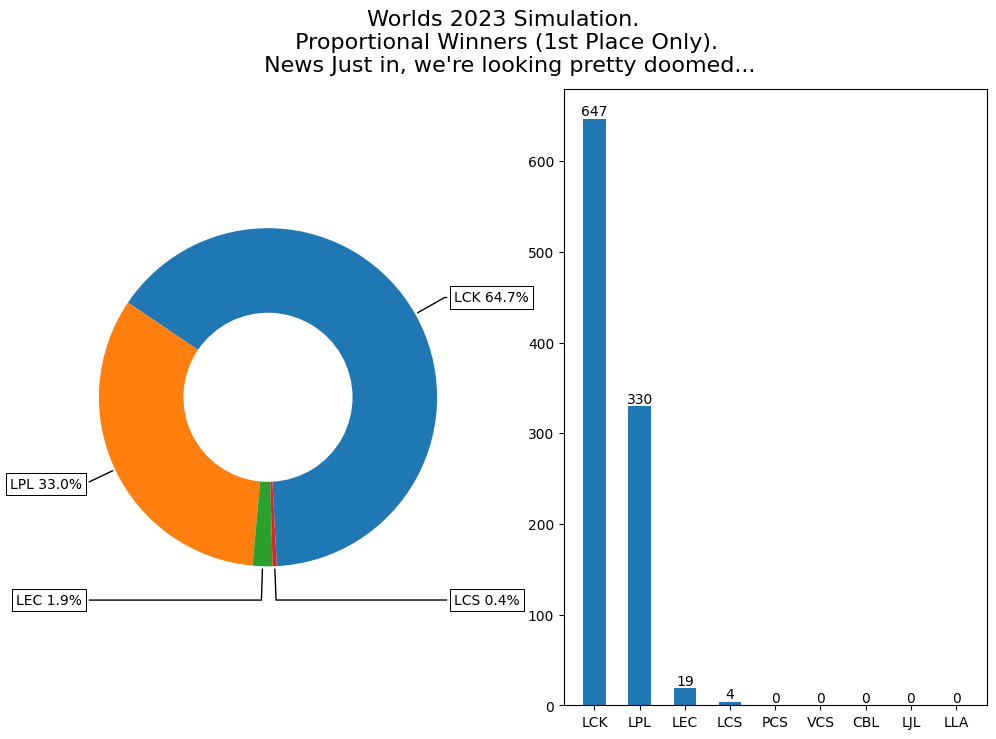

In [86]:
donutdata = position_count_01
percent_strings = []
for data in donutdata[:4]:
    percent_strings.append(str(data/10)+"%")

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12, 8))#, subplot_kw=dict(aspect="equal"))

wedges, texts = ax1.pie(donutdata[:4], wedgeprops=dict(width=0.5), startangle=-87)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(str(list_of_all_global_regions[i])+" "+percent_strings[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

count = ax2.bar(list_of_all_global_regions,donutdata, width=0.5)
ax2.bar_label(count,label_type="edge")

fig.suptitle("Worlds 2023 Simulation. \n Proportional Winners (1st Place Only). \n Headline News: We're looking pretty doomed...", size=16)

plt.show()

# Results - Runners Up
We're lookin more likey to make it as Runners up in the finals. Here the west has a combined 7.2% showing, still with no Minor Region presence in the 1,000 simulated brackets. The message I feel this should convey is just how excellent of a performance we are in need of in order to make it to the finals under the new system.

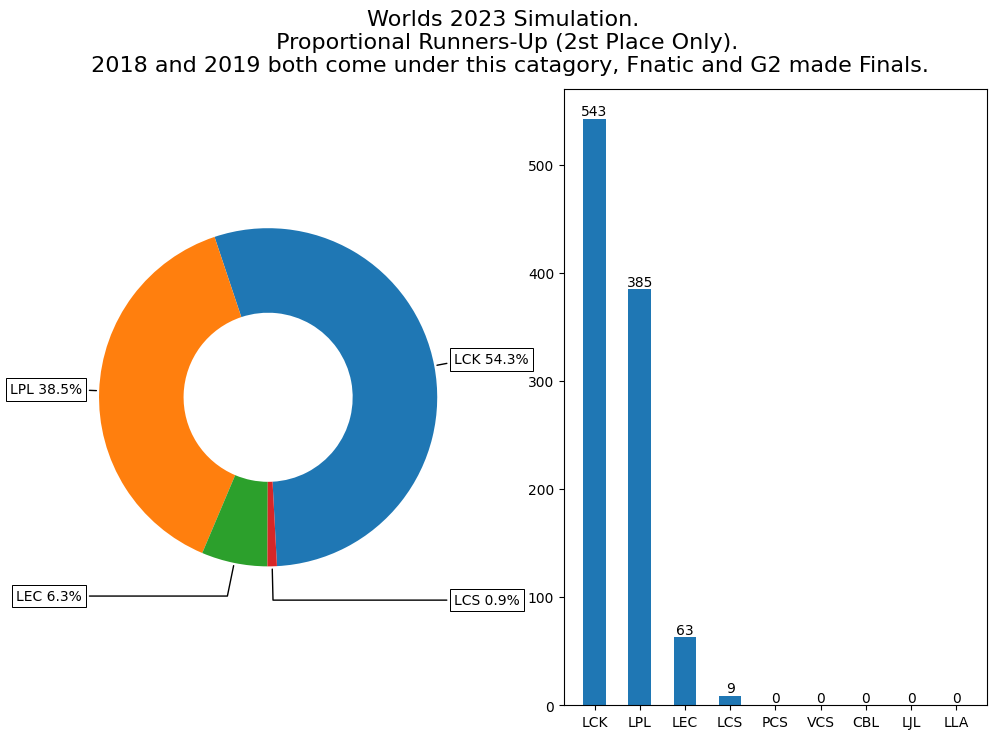

In [91]:
donutdata = position_count_02
percent_strings = []
for data in donutdata[:4]:
    percent_strings.append(str(data/10)+"%")

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12, 8))#, subplot_kw=dict(aspect="equal"))

wedges, texts = ax1.pie(donutdata[:4], wedgeprops=dict(width=0.5), startangle=-87)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(str(list_of_all_global_regions[i])+" "+percent_strings[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

count = ax2.bar(list_of_all_global_regions,donutdata, width=0.5)
ax2.bar_label(count,label_type="edge")

fig.suptitle("Worlds 2023 Simulation. \n Proportional Runners-Up (2st Place Only). \n 2018 and 2019 both come under this catagory, Fnatic and G2 made Finals.", size=16)

plt.show()

# Results - 3rd/4th
We begin to see that the west has a genuine chance of making it a Semi-Finals match. a collective 17.35% to make atleast one of 3rd or 4th. We also see the appearence of the first Minor Region team, with 1 out of the 1,000 simulations having one PCS team arrive to (then be knocked out in) the Semi-Finals.

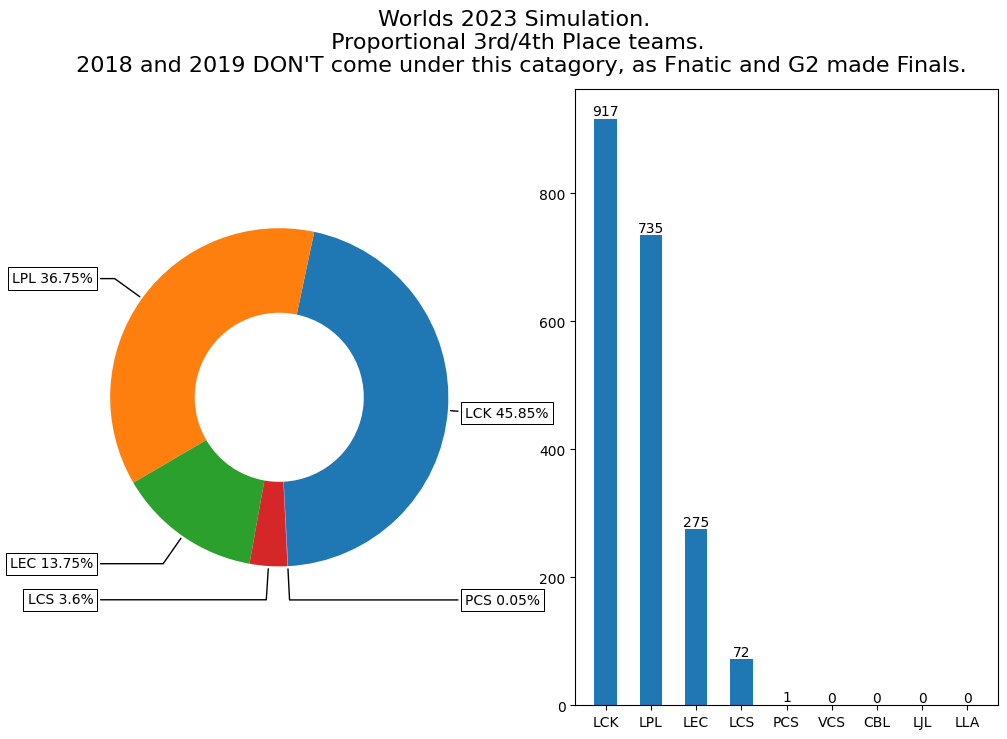

In [105]:
donutdata = np.array(position_count_03) + np.array(position_count_04)
percent_strings = []
for data in donutdata:
    percent_strings.append(str(data/20)+"%")

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12, 8))#, subplot_kw=dict(aspect="equal"))

wedges, texts = ax1.pie(donutdata[:5], wedgeprops=dict(width=0.5), startangle=-87)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(str(list_of_all_global_regions[i])+" "+percent_strings[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

count = ax2.bar(list_of_all_global_regions,donutdata, width=0.5)
ax2.bar_label(count,label_type="edge")

fig.suptitle("Worlds 2023 Simulation. \n Proportional 3rd/4th Place teams. \n 2018 and 2019 DON'T come under this catagory, as Fnatic and G2 made Finals.", size=16)

plt.show()

## Follow On - 3rd/4th

But we need to consider this is only the proportion of teams that finished 3rd/4th. We see that for actual appearances in the semi-final, the west has just over 11% of the appearences in the Semi-Finals. Given there has been 8 times in the data-set a Western team made Semi-Finals (FNC 2015, FNC 2018, G2 2018, G2 2020, G2 2019, Origin 2015, H2k 2016, C9 2018), then historically we those 8 times out of (8yrs * 4 teams a year) 32, or 25% of Semi-Final appearances in the data-set have been western teams.

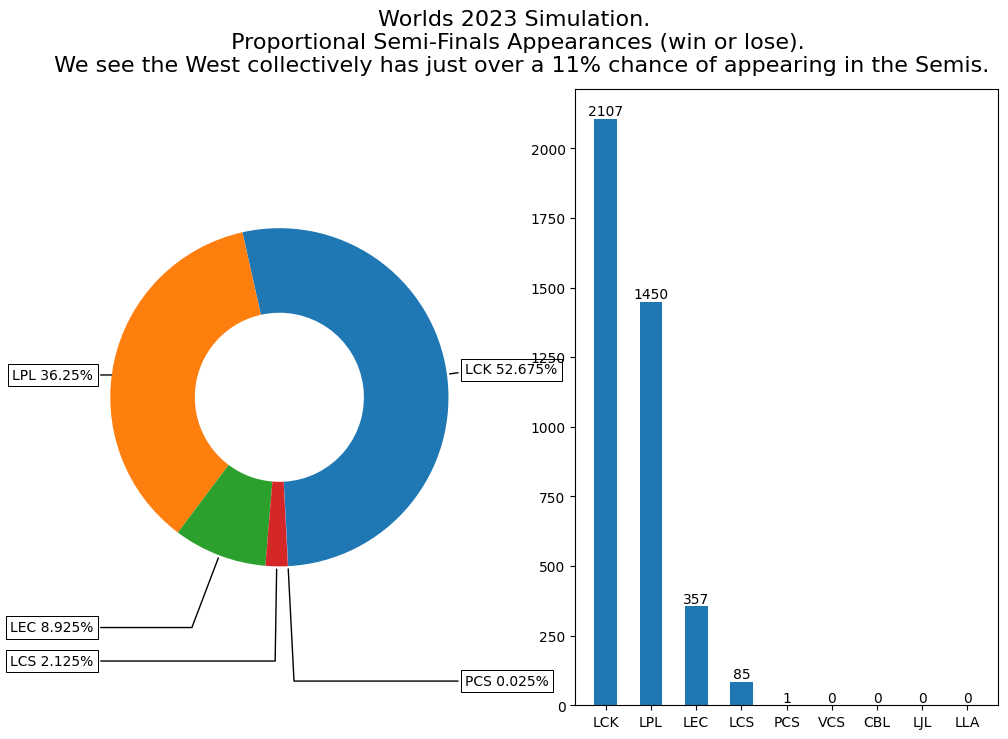

In [104]:
donutdata = np.array(position_count_03) + np.array(position_count_04) + np.array(position_count_02) + np.array(position_count_01)
percent_strings = []
for data in donutdata:
    percent_strings.append(str(data/40)+"%")

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(12, 8))#, subplot_kw=dict(aspect="equal"))

wedges, texts = ax1.pie(donutdata[:5], wedgeprops=dict(width=0.5), startangle=-87)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(str(list_of_all_global_regions[i])+" "+percent_strings[i], xy=(x, y), xytext=(1.1*np.sign(x), -(i*0.12)+1.2*y),
                horizontalalignment=horizontalalignment, **kw)

count = ax2.bar(list_of_all_global_regions,donutdata, width=0.5)
ax2.bar_label(count,label_type="edge")

fig.suptitle("Worlds 2023 Simulation. \n Proportional Semi-Finals Appearances (win or lose). \n The Collective West has just over an 11% chance of appearing in the Semis.", size=16)

plt.show()